# Data Preparation
Data from [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow book](https://github.com/ageron/handson-ml3/blob/main/15_processing_sequences_using_rnns_and_cnns.ipynb)

In [1]:
!wget https://github.com/ageron/data/raw/main/ridership.tgz

--2025-04-27 12:20:41--  https://github.com/ageron/data/raw/main/ridership.tgz
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ageron/data/main/ridership.tgz [following]
--2025-04-27 12:20:42--  https://raw.githubusercontent.com/ageron/data/main/ridership.tgz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108512 (106K) [application/octet-stream]
Saving to: ‘ridership.tgz.1’

ridership.tgz.1     100%[===================>] 105.97K  --.-KB/s    in 0.03s   

2025-04-27 12:20:42 (3.80 MB/s) - ‘ridership.tgz.1’ saved [108512/108512]



In [2]:
!tar -xf ridership.tgz

In [3]:
import pandas as pd
from tqdm import tqdm


In [4]:
df = pd.read_csv("ridership/CTA_-_Ridership_-_Daily_Boarding_Totals.csv", parse_dates=["service_date"])
df.columns = ["date", "day_type", "bus", "rail", "total"] # shorter names
df = df.sort_values("date").set_index("date")
df = df.drop("total", axis=1) # no need for total, it's just bus + rail
df = df.drop_duplicates() # remove duplicated months (2011-10 and 2014-07)

In [5]:
df.head()

,day_type,bus,rail
date,,,
2001-01-01,U,297192,126455
2001-01-02,W,780827,501952
2001-01-03,W,824923,536432
2001-01-04,W,870021,550011
2001-01-05,W,890426,557917


In [6]:
df.day_type.unique()

array(['U', 'W', 'A'], dtype=object)

According to the dataset origin:


*   U = Sunday/ Holiday
*   W = Weekday
*   A = Saturday



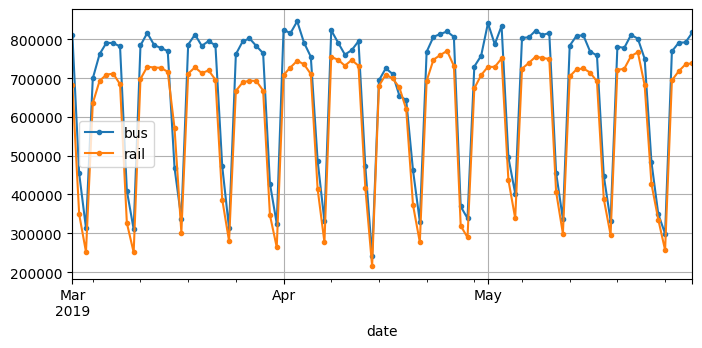

In [7]:
import matplotlib.pyplot as plt
df["2019-03":"2019-05"].plot(grid=True, marker=".", figsize=(8, 3.5))
plt.show()


In [8]:
rail_train = df["rail"]["2016-01":"2018-12"] / 1e6
rail_valid = df["rail"]["2019-01":"2019-05"] / 1e6
rail_test = df["rail"]["2019-06":] / 1e6

In [9]:
len(rail_train), len(rail_valid), len(rail_test)

(1096, 151, 914)

<Axes: xlabel='date'>

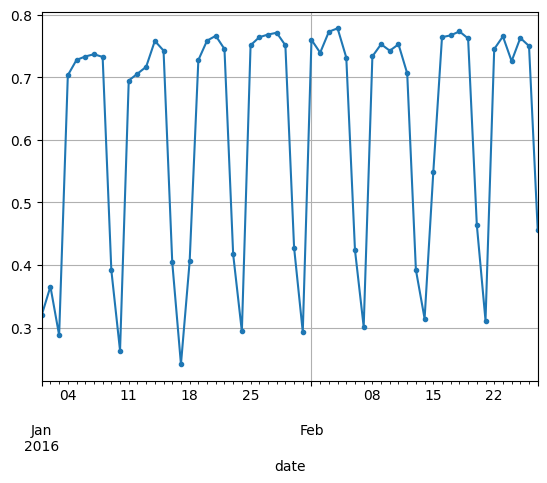

In [10]:
rail_train[:58].plot(grid=True, marker=".")

### Setting the data Lags

In [11]:
def into_steps(df, n=56):
    '''
    Creates lags
    '''
    dfcopy = df.copy()
    for i in range(1, n+1):
        dfcopy[f'x{i}'] = dfcopy['rail'].shift(i)
    dfcopy = dfcopy.dropna()
    return dfcopy


In [12]:
def Get_Xy(df):
    '''
    get X, y np.arrays
    '''
    dfcopy = df.copy().to_frame().reset_index(drop=True)

    # Call into_steps function to  create lags
    dfcopy = into_steps(dfcopy)

    X = dfcopy.drop('rail', axis=1)
    y = dfcopy['rail']

    return X, y


In [13]:
X_train, y_train = Get_Xy(rail_train)
X_valid, y_valid = Get_Xy(rail_valid)
X_test, y_test = Get_Xy(rail_test)

In [14]:
X_train.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56
count,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,...,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000
mean,0.635257,0.635700,0.636141,0.636382,0.636246,0.636296,0.636905,0.637380,0.637868,0.638276,...,0.638830,0.638470,0.638435,0.638516,0.638928,0.639257,0.639210,0.638720,0.638319,0.637891
std,0.181670,0.181329,0.181086,0.181063,0.181255,0.181200,0.180554,0.180262,0.179926,0.179729,...,0.179675,0.179795,0.179773,0.179798,0.179523,0.179372,0.179349,0.179613,0.179757,0.179985
min,0.118654,0.118654,0.118654,0.118654,0.118654,0.118654,0.118654,0.118654,0.118654,0.118654,...,0.118654,0.118654,0.118654,0.118654,0.118654,0.118654,0.118654,0.118654,0.118654,0.118654
25%,0.461497,0.462022,0.462263,0.462263,0.462263,0.462400,0.463719,0.464436,0.464810,0.465397,...,0.465397,0.464810,0.464810,0.464810,0.465397,0.466211,0.466211,0.465397,0.464810,0.464436
50%,0.727985,0.727985,0.728348,0.728954,0.728954,0.728954,0.729440,0.729661,0.730074,0.730398,...,0.731232,0.730903,0.730903,0.731232,0.731556,0.731556,0.731232,0.730903,0.730753,0.730589
75%,0.767464,0.767464,0.767464,0.767464,0.767464,0.767464,0.767464,0.767570,0.767570,0.767570,...,0.767748,0.767748,0.767704,0.767704,0.767704,0.767704,0.767704,0.767668,0.767570,0.767570
max,1.146516,1.146516,1.146516,1.146516,1.146516,1.146516,1.146516,1.146516,1.146516,1.146516,...,1.146516,1.146516,1.146516,1.146516,1.146516,1.146516,1.146516,1.146516,1.146516,1.146516


In [15]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [16]:
def GetLoader(X, y, train=True):
    X_tensor = torch.tensor(X.values, dtype=torch.float32)
    y_tensor = torch.tensor(y.values, dtype=torch.float32)

    if train:
        dataset = TensorDataset(X_tensor, y_tensor)
        loader = DataLoader(dataset, batch_size=32, shuffle=False)
        return loader

    else:
        return (X_tensor, y_tensor)

In [17]:
# Train Data
train_loader = GetLoader(X_train, y_train)

# Validation Data
valid_loader =GetLoader(X_valid, y_valid, train=False)

# Test Data
test_loader =GetLoader(X_test, y_test, train=False)


# MLB

In [18]:
# MLP model
class mlp(nn.Module):

    def __init__(self):
        super().__init__()
        self.input_layer = nn.Linear(56, 32)
        self.hidden1 = nn.Linear(32, 16)
        self.hidden2 = nn.Linear(16, 8)
        self.output_layer = nn.Linear(8, 1)

        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.input_layer(x))
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.output_layer(x)
        return x



In [19]:
# Loss function
lossfn = nn.MSELoss()

def rmse(y_pred, y_true):
    return torch.sqrt(nn.functional.mse_loss(y_pred, y_true))

def mae(y_pred, y_true):
    return torch.mean(torch.abs(y_pred - y_true))

# optimizer


### Training

In [20]:
def train_one_epoch(train_loader, model, lossfn, optimizer):
    model.train()
    total_loss = 0.0
    total_rmse = 0.0
    total_mae = 0.0


    pbar = tqdm(train_loader)
    for input, target in pbar:
        input.to(device)
        target.to(device)

        opt.zero_grad()
        output = model(input)

        loss = lossfn(output, target.unsqueeze(1))

        loss.backward()

        optimizer.step()

        total_loss +=loss.item()
        total_rmse += rmse(output, target.unsqueeze(1)).item()
        total_mae += mae(output, target.unsqueeze(1)).item()

    return total_loss, total_rmse, total_mae


In [21]:
def train_model(train_loader, model, lossfn, opt, tolerance=10):
    lastlosses = [10]
    epoch = 1
    avg_loss = 0
    while epoch < tolerance or avg_loss < max(lastlosses):
        loss, rmse_loss, mae_loss = train_one_epoch(train_loader, model, lossfn, opt)
        lastlosses.append(avg_loss)
        if len(lastlosses) >10:
            lastlosses.pop(0)

        avg_loss = loss/len(train_loader)
        avg_rmse = rmse_loss/len(train_loader)
        avg_mae = mae_loss/len(train_loader)

        print(f"Epoch [{epoch}], MSE-Loss: {avg_loss:.4f}, RMSE-Loss: {avg_rmse:.4f}, MAE-Loss: {avg_mae:.4f}")
        epoch +=1
    return avg_loss, avg_rmse, avg_mae

In [22]:

mlp_model = mlp().to(device)

opt = torch.optim.Adam(mlp_model.parameters(), lr = 1e-3)

t_mse_mlp, t_rmse_mlp, t_mae_mlp = train_model(train_loader, mlp_model, lossfn, opt)

100%|██████████| 33/33 [00:00<00:00, 494.25it/s]


Epoch [1], MSE-Loss: 0.2265, RMSE-Loss: 0.4465, MAE-Loss: 0.4186


100%|██████████| 33/33 [00:00<00:00, 513.69it/s]


Epoch [2], MSE-Loss: 0.0328, RMSE-Loss: 0.1792, MAE-Loss: 0.1473


100%|██████████| 33/33 [00:00<00:00, 403.77it/s]


Epoch [3], MSE-Loss: 0.0273, RMSE-Loss: 0.1638, MAE-Loss: 0.1445


100%|██████████| 33/33 [00:00<00:00, 307.19it/s]


Epoch [4], MSE-Loss: 0.0228, RMSE-Loss: 0.1490, MAE-Loss: 0.1305


100%|██████████| 33/33 [00:00<00:00, 357.98it/s]


Epoch [5], MSE-Loss: 0.0178, RMSE-Loss: 0.1308, MAE-Loss: 0.1114


100%|██████████| 33/33 [00:00<00:00, 332.48it/s]


Epoch [6], MSE-Loss: 0.0136, RMSE-Loss: 0.1122, MAE-Loss: 0.0908


100%|██████████| 33/33 [00:00<00:00, 315.76it/s]


Epoch [7], MSE-Loss: 0.0111, RMSE-Loss: 0.0995, MAE-Loss: 0.0758


100%|██████████| 33/33 [00:00<00:00, 371.33it/s]


Epoch [8], MSE-Loss: 0.0098, RMSE-Loss: 0.0921, MAE-Loss: 0.0672


100%|██████████| 33/33 [00:00<00:00, 360.51it/s]


Epoch [9], MSE-Loss: 0.0091, RMSE-Loss: 0.0874, MAE-Loss: 0.0623


100%|██████████| 33/33 [00:00<00:00, 360.62it/s]


Epoch [10], MSE-Loss: 0.0086, RMSE-Loss: 0.0845, MAE-Loss: 0.0589


100%|██████████| 33/33 [00:00<00:00, 368.84it/s]


Epoch [11], MSE-Loss: 0.0083, RMSE-Loss: 0.0826, MAE-Loss: 0.0569


100%|██████████| 33/33 [00:00<00:00, 353.87it/s]


Epoch [12], MSE-Loss: 0.0081, RMSE-Loss: 0.0812, MAE-Loss: 0.0555


100%|██████████| 33/33 [00:00<00:00, 351.68it/s]


Epoch [13], MSE-Loss: 0.0080, RMSE-Loss: 0.0803, MAE-Loss: 0.0545


100%|██████████| 33/33 [00:00<00:00, 446.04it/s]


Epoch [14], MSE-Loss: 0.0078, RMSE-Loss: 0.0794, MAE-Loss: 0.0537


100%|██████████| 33/33 [00:00<00:00, 490.82it/s]


Epoch [15], MSE-Loss: 0.0077, RMSE-Loss: 0.0787, MAE-Loss: 0.0530


100%|██████████| 33/33 [00:00<00:00, 473.67it/s]


Epoch [16], MSE-Loss: 0.0076, RMSE-Loss: 0.0781, MAE-Loss: 0.0523


100%|██████████| 33/33 [00:00<00:00, 493.58it/s]


Epoch [17], MSE-Loss: 0.0075, RMSE-Loss: 0.0775, MAE-Loss: 0.0518


100%|██████████| 33/33 [00:00<00:00, 484.51it/s]


Epoch [18], MSE-Loss: 0.0074, RMSE-Loss: 0.0769, MAE-Loss: 0.0512


100%|██████████| 33/33 [00:00<00:00, 398.82it/s]


Epoch [19], MSE-Loss: 0.0073, RMSE-Loss: 0.0764, MAE-Loss: 0.0508


100%|██████████| 33/33 [00:00<00:00, 515.56it/s]


Epoch [20], MSE-Loss: 0.0072, RMSE-Loss: 0.0759, MAE-Loss: 0.0503


100%|██████████| 33/33 [00:00<00:00, 505.73it/s]


Epoch [21], MSE-Loss: 0.0071, RMSE-Loss: 0.0755, MAE-Loss: 0.0499


100%|██████████| 33/33 [00:00<00:00, 491.15it/s]


Epoch [22], MSE-Loss: 0.0070, RMSE-Loss: 0.0750, MAE-Loss: 0.0494


100%|██████████| 33/33 [00:00<00:00, 513.61it/s]


Epoch [23], MSE-Loss: 0.0069, RMSE-Loss: 0.0746, MAE-Loss: 0.0490


100%|██████████| 33/33 [00:00<00:00, 472.93it/s]


Epoch [24], MSE-Loss: 0.0068, RMSE-Loss: 0.0742, MAE-Loss: 0.0487


100%|██████████| 33/33 [00:00<00:00, 498.27it/s]


Epoch [25], MSE-Loss: 0.0067, RMSE-Loss: 0.0738, MAE-Loss: 0.0483


100%|██████████| 33/33 [00:00<00:00, 459.72it/s]


Epoch [26], MSE-Loss: 0.0067, RMSE-Loss: 0.0734, MAE-Loss: 0.0480


100%|██████████| 33/33 [00:00<00:00, 502.87it/s]


Epoch [27], MSE-Loss: 0.0066, RMSE-Loss: 0.0731, MAE-Loss: 0.0477


100%|██████████| 33/33 [00:00<00:00, 512.99it/s]


Epoch [28], MSE-Loss: 0.0065, RMSE-Loss: 0.0728, MAE-Loss: 0.0475


100%|██████████| 33/33 [00:00<00:00, 491.64it/s]


Epoch [29], MSE-Loss: 0.0065, RMSE-Loss: 0.0725, MAE-Loss: 0.0472


100%|██████████| 33/33 [00:00<00:00, 511.47it/s]


Epoch [30], MSE-Loss: 0.0064, RMSE-Loss: 0.0722, MAE-Loss: 0.0470


100%|██████████| 33/33 [00:00<00:00, 510.59it/s]


Epoch [31], MSE-Loss: 0.0063, RMSE-Loss: 0.0719, MAE-Loss: 0.0467


100%|██████████| 33/33 [00:00<00:00, 511.27it/s]


Epoch [32], MSE-Loss: 0.0063, RMSE-Loss: 0.0716, MAE-Loss: 0.0464


100%|██████████| 33/33 [00:00<00:00, 490.67it/s]


Epoch [33], MSE-Loss: 0.0062, RMSE-Loss: 0.0714, MAE-Loss: 0.0462


100%|██████████| 33/33 [00:00<00:00, 402.78it/s]


Epoch [34], MSE-Loss: 0.0061, RMSE-Loss: 0.0711, MAE-Loss: 0.0460


100%|██████████| 33/33 [00:00<00:00, 496.29it/s]


Epoch [35], MSE-Loss: 0.0061, RMSE-Loss: 0.0708, MAE-Loss: 0.0458


100%|██████████| 33/33 [00:00<00:00, 490.22it/s]


Epoch [36], MSE-Loss: 0.0060, RMSE-Loss: 0.0706, MAE-Loss: 0.0457


100%|██████████| 33/33 [00:00<00:00, 497.69it/s]


Epoch [37], MSE-Loss: 0.0060, RMSE-Loss: 0.0703, MAE-Loss: 0.0454


100%|██████████| 33/33 [00:00<00:00, 461.95it/s]


Epoch [38], MSE-Loss: 0.0059, RMSE-Loss: 0.0701, MAE-Loss: 0.0453


100%|██████████| 33/33 [00:00<00:00, 519.82it/s]


Epoch [39], MSE-Loss: 0.0059, RMSE-Loss: 0.0698, MAE-Loss: 0.0450


100%|██████████| 33/33 [00:00<00:00, 516.79it/s]


Epoch [40], MSE-Loss: 0.0058, RMSE-Loss: 0.0696, MAE-Loss: 0.0449


100%|██████████| 33/33 [00:00<00:00, 468.76it/s]


Epoch [41], MSE-Loss: 0.0058, RMSE-Loss: 0.0694, MAE-Loss: 0.0447


100%|██████████| 33/33 [00:00<00:00, 502.67it/s]


Epoch [42], MSE-Loss: 0.0058, RMSE-Loss: 0.0692, MAE-Loss: 0.0446


100%|██████████| 33/33 [00:00<00:00, 490.55it/s]


Epoch [43], MSE-Loss: 0.0057, RMSE-Loss: 0.0690, MAE-Loss: 0.0444


100%|██████████| 33/33 [00:00<00:00, 493.70it/s]


Epoch [44], MSE-Loss: 0.0057, RMSE-Loss: 0.0688, MAE-Loss: 0.0442


100%|██████████| 33/33 [00:00<00:00, 495.78it/s]


Epoch [45], MSE-Loss: 0.0056, RMSE-Loss: 0.0686, MAE-Loss: 0.0441


100%|██████████| 33/33 [00:00<00:00, 497.76it/s]


Epoch [46], MSE-Loss: 0.0056, RMSE-Loss: 0.0685, MAE-Loss: 0.0439


100%|██████████| 33/33 [00:00<00:00, 488.43it/s]


Epoch [47], MSE-Loss: 0.0056, RMSE-Loss: 0.0683, MAE-Loss: 0.0438


100%|██████████| 33/33 [00:00<00:00, 404.59it/s]


Epoch [48], MSE-Loss: 0.0056, RMSE-Loss: 0.0681, MAE-Loss: 0.0436


100%|██████████| 33/33 [00:00<00:00, 478.27it/s]


Epoch [49], MSE-Loss: 0.0055, RMSE-Loss: 0.0679, MAE-Loss: 0.0435


100%|██████████| 33/33 [00:00<00:00, 460.87it/s]


Epoch [50], MSE-Loss: 0.0055, RMSE-Loss: 0.0678, MAE-Loss: 0.0434


100%|██████████| 33/33 [00:00<00:00, 503.98it/s]


Epoch [51], MSE-Loss: 0.0055, RMSE-Loss: 0.0677, MAE-Loss: 0.0433


100%|██████████| 33/33 [00:00<00:00, 499.38it/s]


Epoch [52], MSE-Loss: 0.0054, RMSE-Loss: 0.0676, MAE-Loss: 0.0432


100%|██████████| 33/33 [00:00<00:00, 490.06it/s]


Epoch [53], MSE-Loss: 0.0054, RMSE-Loss: 0.0674, MAE-Loss: 0.0431


100%|██████████| 33/33 [00:00<00:00, 467.48it/s]


Epoch [54], MSE-Loss: 0.0054, RMSE-Loss: 0.0672, MAE-Loss: 0.0429


100%|██████████| 33/33 [00:00<00:00, 485.51it/s]


Epoch [55], MSE-Loss: 0.0053, RMSE-Loss: 0.0671, MAE-Loss: 0.0428


100%|██████████| 33/33 [00:00<00:00, 512.23it/s]


Epoch [56], MSE-Loss: 0.0053, RMSE-Loss: 0.0670, MAE-Loss: 0.0427


100%|██████████| 33/33 [00:00<00:00, 484.23it/s]


Epoch [57], MSE-Loss: 0.0053, RMSE-Loss: 0.0668, MAE-Loss: 0.0426


100%|██████████| 33/33 [00:00<00:00, 469.63it/s]


Epoch [58], MSE-Loss: 0.0053, RMSE-Loss: 0.0667, MAE-Loss: 0.0425


100%|██████████| 33/33 [00:00<00:00, 488.82it/s]


Epoch [59], MSE-Loss: 0.0053, RMSE-Loss: 0.0666, MAE-Loss: 0.0425


100%|██████████| 33/33 [00:00<00:00, 510.46it/s]


Epoch [60], MSE-Loss: 0.0052, RMSE-Loss: 0.0665, MAE-Loss: 0.0424


100%|██████████| 33/33 [00:00<00:00, 489.06it/s]


Epoch [61], MSE-Loss: 0.0052, RMSE-Loss: 0.0664, MAE-Loss: 0.0423


100%|██████████| 33/33 [00:00<00:00, 426.90it/s]


Epoch [62], MSE-Loss: 0.0052, RMSE-Loss: 0.0663, MAE-Loss: 0.0423


100%|██████████| 33/33 [00:00<00:00, 445.45it/s]


Epoch [63], MSE-Loss: 0.0052, RMSE-Loss: 0.0662, MAE-Loss: 0.0422


100%|██████████| 33/33 [00:00<00:00, 482.52it/s]


Epoch [64], MSE-Loss: 0.0052, RMSE-Loss: 0.0661, MAE-Loss: 0.0421


100%|██████████| 33/33 [00:00<00:00, 501.70it/s]


Epoch [65], MSE-Loss: 0.0051, RMSE-Loss: 0.0660, MAE-Loss: 0.0420


100%|██████████| 33/33 [00:00<00:00, 443.53it/s]


Epoch [66], MSE-Loss: 0.0051, RMSE-Loss: 0.0659, MAE-Loss: 0.0420


100%|██████████| 33/33 [00:00<00:00, 493.75it/s]


Epoch [67], MSE-Loss: 0.0051, RMSE-Loss: 0.0658, MAE-Loss: 0.0418


100%|██████████| 33/33 [00:00<00:00, 471.88it/s]


Epoch [68], MSE-Loss: 0.0051, RMSE-Loss: 0.0658, MAE-Loss: 0.0419


100%|██████████| 33/33 [00:00<00:00, 500.52it/s]


Epoch [69], MSE-Loss: 0.0051, RMSE-Loss: 0.0656, MAE-Loss: 0.0417


100%|██████████| 33/33 [00:00<00:00, 483.98it/s]


Epoch [70], MSE-Loss: 0.0051, RMSE-Loss: 0.0656, MAE-Loss: 0.0418


100%|██████████| 33/33 [00:00<00:00, 454.15it/s]


Epoch [71], MSE-Loss: 0.0050, RMSE-Loss: 0.0655, MAE-Loss: 0.0417


100%|██████████| 33/33 [00:00<00:00, 340.06it/s]


Epoch [72], MSE-Loss: 0.0050, RMSE-Loss: 0.0654, MAE-Loss: 0.0416


100%|██████████| 33/33 [00:00<00:00, 323.15it/s]


Epoch [73], MSE-Loss: 0.0050, RMSE-Loss: 0.0655, MAE-Loss: 0.0418


100%|██████████| 33/33 [00:00<00:00, 358.93it/s]


Epoch [74], MSE-Loss: 0.0050, RMSE-Loss: 0.0653, MAE-Loss: 0.0417


100%|██████████| 33/33 [00:00<00:00, 286.35it/s]


Epoch [75], MSE-Loss: 0.0050, RMSE-Loss: 0.0652, MAE-Loss: 0.0416


100%|██████████| 33/33 [00:00<00:00, 320.81it/s]


Epoch [76], MSE-Loss: 0.0050, RMSE-Loss: 0.0652, MAE-Loss: 0.0416


100%|██████████| 33/33 [00:00<00:00, 371.01it/s]


Epoch [77], MSE-Loss: 0.0050, RMSE-Loss: 0.0652, MAE-Loss: 0.0416


100%|██████████| 33/33 [00:00<00:00, 341.24it/s]


Epoch [78], MSE-Loss: 0.0049, RMSE-Loss: 0.0651, MAE-Loss: 0.0415


100%|██████████| 33/33 [00:00<00:00, 344.23it/s]


Epoch [79], MSE-Loss: 0.0049, RMSE-Loss: 0.0651, MAE-Loss: 0.0415


100%|██████████| 33/33 [00:00<00:00, 376.16it/s]


Epoch [80], MSE-Loss: 0.0049, RMSE-Loss: 0.0650, MAE-Loss: 0.0415


100%|██████████| 33/33 [00:00<00:00, 384.80it/s]


Epoch [81], MSE-Loss: 0.0049, RMSE-Loss: 0.0650, MAE-Loss: 0.0415


100%|██████████| 33/33 [00:00<00:00, 352.14it/s]


Epoch [82], MSE-Loss: 0.0049, RMSE-Loss: 0.0650, MAE-Loss: 0.0415


100%|██████████| 33/33 [00:00<00:00, 362.25it/s]


Epoch [83], MSE-Loss: 0.0049, RMSE-Loss: 0.0650, MAE-Loss: 0.0415


100%|██████████| 33/33 [00:00<00:00, 345.73it/s]


Epoch [84], MSE-Loss: 0.0049, RMSE-Loss: 0.0650, MAE-Loss: 0.0415


100%|██████████| 33/33 [00:00<00:00, 382.13it/s]


Epoch [85], MSE-Loss: 0.0049, RMSE-Loss: 0.0648, MAE-Loss: 0.0414


100%|██████████| 33/33 [00:00<00:00, 310.92it/s]


Epoch [86], MSE-Loss: 0.0048, RMSE-Loss: 0.0647, MAE-Loss: 0.0414


100%|██████████| 33/33 [00:00<00:00, 343.25it/s]


Epoch [87], MSE-Loss: 0.0048, RMSE-Loss: 0.0647, MAE-Loss: 0.0414


100%|██████████| 33/33 [00:00<00:00, 378.25it/s]


Epoch [88], MSE-Loss: 0.0048, RMSE-Loss: 0.0647, MAE-Loss: 0.0413


100%|██████████| 33/33 [00:00<00:00, 393.47it/s]


Epoch [89], MSE-Loss: 0.0048, RMSE-Loss: 0.0644, MAE-Loss: 0.0411


100%|██████████| 33/33 [00:00<00:00, 377.59it/s]


Epoch [90], MSE-Loss: 0.0048, RMSE-Loss: 0.0644, MAE-Loss: 0.0411


100%|██████████| 33/33 [00:00<00:00, 380.60it/s]


Epoch [91], MSE-Loss: 0.0048, RMSE-Loss: 0.0644, MAE-Loss: 0.0411


100%|██████████| 33/33 [00:00<00:00, 341.78it/s]


Epoch [92], MSE-Loss: 0.0048, RMSE-Loss: 0.0644, MAE-Loss: 0.0412


100%|██████████| 33/33 [00:00<00:00, 330.50it/s]


Epoch [93], MSE-Loss: 0.0048, RMSE-Loss: 0.0643, MAE-Loss: 0.0411


100%|██████████| 33/33 [00:00<00:00, 343.99it/s]


Epoch [94], MSE-Loss: 0.0047, RMSE-Loss: 0.0641, MAE-Loss: 0.0409


100%|██████████| 33/33 [00:00<00:00, 353.99it/s]


Epoch [95], MSE-Loss: 0.0047, RMSE-Loss: 0.0640, MAE-Loss: 0.0408


100%|██████████| 33/33 [00:00<00:00, 331.41it/s]


Epoch [96], MSE-Loss: 0.0047, RMSE-Loss: 0.0640, MAE-Loss: 0.0408


100%|██████████| 33/33 [00:00<00:00, 246.23it/s]


Epoch [97], MSE-Loss: 0.0047, RMSE-Loss: 0.0639, MAE-Loss: 0.0408


100%|██████████| 33/33 [00:00<00:00, 348.87it/s]


Epoch [98], MSE-Loss: 0.0047, RMSE-Loss: 0.0639, MAE-Loss: 0.0407


100%|██████████| 33/33 [00:00<00:00, 310.31it/s]


Epoch [99], MSE-Loss: 0.0047, RMSE-Loss: 0.0638, MAE-Loss: 0.0407


100%|██████████| 33/33 [00:00<00:00, 259.09it/s]


Epoch [100], MSE-Loss: 0.0047, RMSE-Loss: 0.0639, MAE-Loss: 0.0408


100%|██████████| 33/33 [00:00<00:00, 338.96it/s]


Epoch [101], MSE-Loss: 0.0047, RMSE-Loss: 0.0638, MAE-Loss: 0.0407


100%|██████████| 33/33 [00:00<00:00, 460.96it/s]


Epoch [102], MSE-Loss: 0.0047, RMSE-Loss: 0.0636, MAE-Loss: 0.0405


100%|██████████| 33/33 [00:00<00:00, 480.73it/s]


Epoch [103], MSE-Loss: 0.0046, RMSE-Loss: 0.0636, MAE-Loss: 0.0405


100%|██████████| 33/33 [00:00<00:00, 495.75it/s]


Epoch [104], MSE-Loss: 0.0046, RMSE-Loss: 0.0633, MAE-Loss: 0.0403


100%|██████████| 33/33 [00:00<00:00, 455.31it/s]


Epoch [105], MSE-Loss: 0.0046, RMSE-Loss: 0.0633, MAE-Loss: 0.0402


100%|██████████| 33/33 [00:00<00:00, 481.04it/s]


Epoch [106], MSE-Loss: 0.0046, RMSE-Loss: 0.0632, MAE-Loss: 0.0402


100%|██████████| 33/33 [00:00<00:00, 474.66it/s]


Epoch [107], MSE-Loss: 0.0046, RMSE-Loss: 0.0632, MAE-Loss: 0.0403


100%|██████████| 33/33 [00:00<00:00, 473.21it/s]


Epoch [108], MSE-Loss: 0.0046, RMSE-Loss: 0.0633, MAE-Loss: 0.0404


100%|██████████| 33/33 [00:00<00:00, 410.81it/s]


Epoch [109], MSE-Loss: 0.0046, RMSE-Loss: 0.0632, MAE-Loss: 0.0402


100%|██████████| 33/33 [00:00<00:00, 458.74it/s]


Epoch [110], MSE-Loss: 0.0046, RMSE-Loss: 0.0631, MAE-Loss: 0.0402


100%|██████████| 33/33 [00:00<00:00, 473.17it/s]


Epoch [111], MSE-Loss: 0.0046, RMSE-Loss: 0.0630, MAE-Loss: 0.0401


100%|██████████| 33/33 [00:00<00:00, 497.62it/s]


Epoch [112], MSE-Loss: 0.0045, RMSE-Loss: 0.0627, MAE-Loss: 0.0398


100%|██████████| 33/33 [00:00<00:00, 475.09it/s]


Epoch [113], MSE-Loss: 0.0045, RMSE-Loss: 0.0626, MAE-Loss: 0.0398


100%|██████████| 33/33 [00:00<00:00, 487.58it/s]


Epoch [114], MSE-Loss: 0.0045, RMSE-Loss: 0.0626, MAE-Loss: 0.0398


100%|██████████| 33/33 [00:00<00:00, 479.32it/s]


Epoch [115], MSE-Loss: 0.0045, RMSE-Loss: 0.0626, MAE-Loss: 0.0397


100%|██████████| 33/33 [00:00<00:00, 479.58it/s]


Epoch [116], MSE-Loss: 0.0045, RMSE-Loss: 0.0624, MAE-Loss: 0.0396


100%|██████████| 33/33 [00:00<00:00, 485.73it/s]


Epoch [117], MSE-Loss: 0.0045, RMSE-Loss: 0.0623, MAE-Loss: 0.0394


100%|██████████| 33/33 [00:00<00:00, 465.19it/s]


Epoch [118], MSE-Loss: 0.0045, RMSE-Loss: 0.0623, MAE-Loss: 0.0394


100%|██████████| 33/33 [00:00<00:00, 477.40it/s]


Epoch [119], MSE-Loss: 0.0044, RMSE-Loss: 0.0621, MAE-Loss: 0.0393


100%|██████████| 33/33 [00:00<00:00, 477.53it/s]


Epoch [120], MSE-Loss: 0.0044, RMSE-Loss: 0.0618, MAE-Loss: 0.0391


100%|██████████| 33/33 [00:00<00:00, 479.08it/s]


Epoch [121], MSE-Loss: 0.0044, RMSE-Loss: 0.0616, MAE-Loss: 0.0388


100%|██████████| 33/33 [00:00<00:00, 448.49it/s]


Epoch [122], MSE-Loss: 0.0044, RMSE-Loss: 0.0616, MAE-Loss: 0.0388


100%|██████████| 33/33 [00:00<00:00, 404.02it/s]


Epoch [123], MSE-Loss: 0.0044, RMSE-Loss: 0.0615, MAE-Loss: 0.0388


100%|██████████| 33/33 [00:00<00:00, 475.08it/s]


Epoch [124], MSE-Loss: 0.0044, RMSE-Loss: 0.0615, MAE-Loss: 0.0387


100%|██████████| 33/33 [00:00<00:00, 461.92it/s]


Epoch [125], MSE-Loss: 0.0044, RMSE-Loss: 0.0616, MAE-Loss: 0.0389


100%|██████████| 33/33 [00:00<00:00, 473.65it/s]


Epoch [126], MSE-Loss: 0.0044, RMSE-Loss: 0.0617, MAE-Loss: 0.0391


100%|██████████| 33/33 [00:00<00:00, 459.94it/s]


Epoch [127], MSE-Loss: 0.0044, RMSE-Loss: 0.0616, MAE-Loss: 0.0391


100%|██████████| 33/33 [00:00<00:00, 466.19it/s]


Epoch [128], MSE-Loss: 0.0043, RMSE-Loss: 0.0614, MAE-Loss: 0.0389


100%|██████████| 33/33 [00:00<00:00, 493.59it/s]


Epoch [129], MSE-Loss: 0.0043, RMSE-Loss: 0.0612, MAE-Loss: 0.0386


100%|██████████| 33/33 [00:00<00:00, 469.64it/s]


Epoch [130], MSE-Loss: 0.0043, RMSE-Loss: 0.0610, MAE-Loss: 0.0384


100%|██████████| 33/33 [00:00<00:00, 449.28it/s]


Epoch [131], MSE-Loss: 0.0043, RMSE-Loss: 0.0609, MAE-Loss: 0.0383


100%|██████████| 33/33 [00:00<00:00, 455.49it/s]


Epoch [132], MSE-Loss: 0.0042, RMSE-Loss: 0.0607, MAE-Loss: 0.0382


100%|██████████| 33/33 [00:00<00:00, 481.81it/s]


Epoch [133], MSE-Loss: 0.0042, RMSE-Loss: 0.0605, MAE-Loss: 0.0380


100%|██████████| 33/33 [00:00<00:00, 467.52it/s]


Epoch [134], MSE-Loss: 0.0042, RMSE-Loss: 0.0604, MAE-Loss: 0.0379


100%|██████████| 33/33 [00:00<00:00, 478.68it/s]


Epoch [135], MSE-Loss: 0.0042, RMSE-Loss: 0.0603, MAE-Loss: 0.0380


100%|██████████| 33/33 [00:00<00:00, 482.76it/s]


Epoch [136], MSE-Loss: 0.0042, RMSE-Loss: 0.0603, MAE-Loss: 0.0378


100%|██████████| 33/33 [00:00<00:00, 397.51it/s]


Epoch [137], MSE-Loss: 0.0042, RMSE-Loss: 0.0602, MAE-Loss: 0.0377


100%|██████████| 33/33 [00:00<00:00, 443.23it/s]


Epoch [138], MSE-Loss: 0.0042, RMSE-Loss: 0.0600, MAE-Loss: 0.0376


100%|██████████| 33/33 [00:00<00:00, 452.45it/s]


Epoch [139], MSE-Loss: 0.0042, RMSE-Loss: 0.0600, MAE-Loss: 0.0376


100%|██████████| 33/33 [00:00<00:00, 476.31it/s]


Epoch [140], MSE-Loss: 0.0041, RMSE-Loss: 0.0599, MAE-Loss: 0.0375


100%|██████████| 33/33 [00:00<00:00, 485.79it/s]


Epoch [141], MSE-Loss: 0.0041, RMSE-Loss: 0.0598, MAE-Loss: 0.0374


100%|██████████| 33/33 [00:00<00:00, 484.64it/s]


Epoch [142], MSE-Loss: 0.0041, RMSE-Loss: 0.0597, MAE-Loss: 0.0373


100%|██████████| 33/33 [00:00<00:00, 496.73it/s]


Epoch [143], MSE-Loss: 0.0041, RMSE-Loss: 0.0595, MAE-Loss: 0.0372


100%|██████████| 33/33 [00:00<00:00, 481.22it/s]


Epoch [144], MSE-Loss: 0.0041, RMSE-Loss: 0.0593, MAE-Loss: 0.0371


100%|██████████| 33/33 [00:00<00:00, 493.66it/s]


Epoch [145], MSE-Loss: 0.0041, RMSE-Loss: 0.0593, MAE-Loss: 0.0370


100%|██████████| 33/33 [00:00<00:00, 463.65it/s]


Epoch [146], MSE-Loss: 0.0041, RMSE-Loss: 0.0593, MAE-Loss: 0.0370


100%|██████████| 33/33 [00:00<00:00, 488.20it/s]


Epoch [147], MSE-Loss: 0.0040, RMSE-Loss: 0.0591, MAE-Loss: 0.0368


100%|██████████| 33/33 [00:00<00:00, 478.63it/s]


Epoch [148], MSE-Loss: 0.0040, RMSE-Loss: 0.0590, MAE-Loss: 0.0368


100%|██████████| 33/33 [00:00<00:00, 441.87it/s]


Epoch [149], MSE-Loss: 0.0040, RMSE-Loss: 0.0592, MAE-Loss: 0.0369


100%|██████████| 33/33 [00:00<00:00, 453.85it/s]


Epoch [150], MSE-Loss: 0.0040, RMSE-Loss: 0.0589, MAE-Loss: 0.0367


100%|██████████| 33/33 [00:00<00:00, 359.22it/s]


Epoch [151], MSE-Loss: 0.0040, RMSE-Loss: 0.0588, MAE-Loss: 0.0366


100%|██████████| 33/33 [00:00<00:00, 478.10it/s]


Epoch [152], MSE-Loss: 0.0040, RMSE-Loss: 0.0589, MAE-Loss: 0.0368


100%|██████████| 33/33 [00:00<00:00, 456.58it/s]


Epoch [153], MSE-Loss: 0.0040, RMSE-Loss: 0.0585, MAE-Loss: 0.0364


100%|██████████| 33/33 [00:00<00:00, 489.16it/s]


Epoch [154], MSE-Loss: 0.0040, RMSE-Loss: 0.0587, MAE-Loss: 0.0366


100%|██████████| 33/33 [00:00<00:00, 463.78it/s]


Epoch [155], MSE-Loss: 0.0040, RMSE-Loss: 0.0585, MAE-Loss: 0.0364


100%|██████████| 33/33 [00:00<00:00, 448.18it/s]


Epoch [156], MSE-Loss: 0.0039, RMSE-Loss: 0.0583, MAE-Loss: 0.0363


100%|██████████| 33/33 [00:00<00:00, 431.74it/s]


Epoch [157], MSE-Loss: 0.0039, RMSE-Loss: 0.0583, MAE-Loss: 0.0362


100%|██████████| 33/33 [00:00<00:00, 449.18it/s]


Epoch [158], MSE-Loss: 0.0039, RMSE-Loss: 0.0581, MAE-Loss: 0.0361


100%|██████████| 33/33 [00:00<00:00, 458.73it/s]


Epoch [159], MSE-Loss: 0.0039, RMSE-Loss: 0.0581, MAE-Loss: 0.0360


100%|██████████| 33/33 [00:00<00:00, 463.46it/s]


Epoch [160], MSE-Loss: 0.0039, RMSE-Loss: 0.0581, MAE-Loss: 0.0361


100%|██████████| 33/33 [00:00<00:00, 441.70it/s]


Epoch [161], MSE-Loss: 0.0039, RMSE-Loss: 0.0579, MAE-Loss: 0.0360


100%|██████████| 33/33 [00:00<00:00, 463.07it/s]


Epoch [162], MSE-Loss: 0.0039, RMSE-Loss: 0.0579, MAE-Loss: 0.0360


100%|██████████| 33/33 [00:00<00:00, 446.91it/s]


Epoch [163], MSE-Loss: 0.0039, RMSE-Loss: 0.0577, MAE-Loss: 0.0358


100%|██████████| 33/33 [00:00<00:00, 386.95it/s]


Epoch [164], MSE-Loss: 0.0039, RMSE-Loss: 0.0578, MAE-Loss: 0.0360


100%|██████████| 33/33 [00:00<00:00, 463.10it/s]


Epoch [165], MSE-Loss: 0.0038, RMSE-Loss: 0.0575, MAE-Loss: 0.0360


100%|██████████| 33/33 [00:00<00:00, 467.30it/s]


Epoch [166], MSE-Loss: 0.0039, RMSE-Loss: 0.0577, MAE-Loss: 0.0359


100%|██████████| 33/33 [00:00<00:00, 453.24it/s]


Epoch [167], MSE-Loss: 0.0038, RMSE-Loss: 0.0574, MAE-Loss: 0.0359


100%|██████████| 33/33 [00:00<00:00, 476.97it/s]


Epoch [168], MSE-Loss: 0.0039, RMSE-Loss: 0.0576, MAE-Loss: 0.0360


100%|██████████| 33/33 [00:00<00:00, 466.11it/s]


Epoch [169], MSE-Loss: 0.0038, RMSE-Loss: 0.0573, MAE-Loss: 0.0358


100%|██████████| 33/33 [00:00<00:00, 472.26it/s]


Epoch [170], MSE-Loss: 0.0038, RMSE-Loss: 0.0573, MAE-Loss: 0.0355


100%|██████████| 33/33 [00:00<00:00, 446.32it/s]


Epoch [171], MSE-Loss: 0.0038, RMSE-Loss: 0.0574, MAE-Loss: 0.0360


100%|██████████| 33/33 [00:00<00:00, 494.87it/s]


Epoch [172], MSE-Loss: 0.0038, RMSE-Loss: 0.0573, MAE-Loss: 0.0358


100%|██████████| 33/33 [00:00<00:00, 470.50it/s]


Epoch [173], MSE-Loss: 0.0038, RMSE-Loss: 0.0570, MAE-Loss: 0.0356


100%|██████████| 33/33 [00:00<00:00, 470.57it/s]


Epoch [174], MSE-Loss: 0.0038, RMSE-Loss: 0.0569, MAE-Loss: 0.0354


100%|██████████| 33/33 [00:00<00:00, 470.59it/s]


Epoch [175], MSE-Loss: 0.0038, RMSE-Loss: 0.0567, MAE-Loss: 0.0354


100%|██████████| 33/33 [00:00<00:00, 389.25it/s]


Epoch [176], MSE-Loss: 0.0038, RMSE-Loss: 0.0568, MAE-Loss: 0.0354


100%|██████████| 33/33 [00:00<00:00, 474.49it/s]


Epoch [177], MSE-Loss: 0.0037, RMSE-Loss: 0.0565, MAE-Loss: 0.0351


100%|██████████| 33/33 [00:00<00:00, 372.80it/s]


Epoch [178], MSE-Loss: 0.0038, RMSE-Loss: 0.0567, MAE-Loss: 0.0352


100%|██████████| 33/33 [00:00<00:00, 471.75it/s]


Epoch [179], MSE-Loss: 0.0037, RMSE-Loss: 0.0566, MAE-Loss: 0.0352


100%|██████████| 33/33 [00:00<00:00, 469.96it/s]


Epoch [180], MSE-Loss: 0.0037, RMSE-Loss: 0.0563, MAE-Loss: 0.0349


100%|██████████| 33/33 [00:00<00:00, 472.44it/s]


Epoch [181], MSE-Loss: 0.0037, RMSE-Loss: 0.0565, MAE-Loss: 0.0350


100%|██████████| 33/33 [00:00<00:00, 481.05it/s]


Epoch [182], MSE-Loss: 0.0037, RMSE-Loss: 0.0564, MAE-Loss: 0.0347


100%|██████████| 33/33 [00:00<00:00, 462.18it/s]


Epoch [183], MSE-Loss: 0.0037, RMSE-Loss: 0.0565, MAE-Loss: 0.0352


100%|██████████| 33/33 [00:00<00:00, 470.03it/s]

Epoch [184], MSE-Loss: 0.0038, RMSE-Loss: 0.0569, MAE-Loss: 0.0353


### Validation

In [23]:
def validate(validation_loader, model, lossfn):
    model.eval()
    X_valid = validation_loader[0].to(device)
    y_valid = validation_loader[1].to(device)

    with torch.no_grad():
        valid_outputs = model(X_valid)
        valid_loss = lossfn(valid_outputs, y_valid.unsqueeze(1))
    mse = valid_loss.item()
    rmse_validation = rmse(valid_outputs, y_valid.unsqueeze(1)).item()
    mae_validation  = mae(valid_outputs, y_valid.unsqueeze(1)).item()

    return mse, rmse_validation, mae_validation

In [24]:
mse_mlp, rmse_mlp, mae_mlp = validate(valid_loader, mlp_model, lossfn)

In [25]:
def get_model_info(model, optimizer):
    info = {}

    # Model information
    info['model_class'] = model.__class__.__name__
    info['num_layers'] = sum(1 for module in model.modules() if isinstance(module, (nn.Linear, nn.RNN, nn.GRU, nn.LSTM)))

    # Optimizer information
    info['optimizer_class'] = optimizer.__class__.__name__
    info['learning_rate'] = optimizer.param_groups[0]['lr']

    return info

In [26]:
def get_model_metrics(t_loss, t_rmse, t_mae, v_loss, v_rmse, v_mae):
    losses = {
    'train_loss': t_loss,
    'train_rmse': t_rmse,
    'train_mae': t_mae,
    'validation_loss': v_loss,
    'validation_rmse': v_rmse,
    'validation_mae': v_mae
    }

    return losses

In [27]:
def get_model_info_metrics(model, optimizer, t_loss, t_rmse, t_mae, v_loss, v_rmse, v_mae, df=None):

    model_info = get_model_info(model, optimizer)
    model_metrics = get_model_metrics(t_loss, t_rmse, t_mae, v_loss, v_rmse, v_mae)
    model_info_dict = pd.DataFrame([{**model_info, **model_metrics}])

    if df is not None:
        return pd.concat([df, model_info_dict])
    else:
        return model_info_dict

In [28]:
mlp_summary = get_model_info_metrics(mlp_model, opt, t_mse_mlp, t_rmse_mlp, t_mae_mlp, mse_mlp, rmse_mlp, mae_mlp)
mlp_summary

,model_class,num_layers,optimizer_class,learning_rate,train_loss,train_rmse,train_mae,validation_loss,validation_rmse,validation_mae
0,mlp,4,Adam,0.001,0.003779,0.05693,0.035327,0.004672,0.068349,0.037867


# RNN

In [29]:
class RnnModel(nn.Module):
    def __init__(self, hidden_size1, hidden_size2, num_layers):
        super().__init__()
        self.hidden_size2 = hidden_size2
        self.rnn = nn.RNN(input_size=1,hidden_size=hidden_size1, num_layers=num_layers, batch_first=True)
        if self.hidden_size2:
            self.rnn2 = nn.RNN(input_size=hidden_size1,hidden_size=hidden_size2, num_layers=num_layers, batch_first=True)

        self.fc = nn.Linear(hidden_size2, 1)

    def forward(self, x):
        x = x.unsqueeze(-1)
        x, hidden = self.rnn(x)

        if self.hidden_size2:
            x, hidden = self.rnn2(x)

        x = x[:, -1, :]
        x = self.fc(x)
        return x



In [30]:
num_epochs = 50
rnn_model = RnnModel(64, 32, 1).to(device)
opt_rnn = torch.optim.Adam(rnn_model.parameters(), lr = 1e-4)
t_mse_rnn, t_rmse_rnn, t_mae_rnn = train_model(train_loader, rnn_model, lossfn, opt_rnn)
v_mse_rnn, v_rmse_rnn, v_mae_rnn = validate(valid_loader, rnn_model, lossfn)

100%|██████████| 33/33 [00:00<00:00, 59.54it/s]


Epoch [1], MSE-Loss: 0.0763, RMSE-Loss: 0.2647, MAE-Loss: 0.2395


100%|██████████| 33/33 [00:00<00:00, 57.85it/s]


Epoch [2], MSE-Loss: 0.0839, RMSE-Loss: 0.2796, MAE-Loss: 0.2240


100%|██████████| 33/33 [00:00<00:00, 60.55it/s]


Epoch [3], MSE-Loss: 0.0477, RMSE-Loss: 0.2140, MAE-Loss: 0.1672


100%|██████████| 33/33 [00:00<00:00, 62.50it/s]


Epoch [4], MSE-Loss: 0.0814, RMSE-Loss: 0.2811, MAE-Loss: 0.2508


100%|██████████| 33/33 [00:00<00:00, 61.11it/s]


Epoch [5], MSE-Loss: 0.0835, RMSE-Loss: 0.2837, MAE-Loss: 0.2547


100%|██████████| 33/33 [00:00<00:00, 62.86it/s]


Epoch [6], MSE-Loss: 0.0374, RMSE-Loss: 0.1890, MAE-Loss: 0.1569


100%|██████████| 33/33 [00:00<00:00, 49.53it/s]


Epoch [7], MSE-Loss: 0.0746, RMSE-Loss: 0.2651, MAE-Loss: 0.2127


100%|██████████| 33/33 [00:00<00:00, 41.78it/s]


Epoch [8], MSE-Loss: 0.0648, RMSE-Loss: 0.2498, MAE-Loss: 0.1978


100%|██████████| 33/33 [00:00<00:00, 43.76it/s]


Epoch [9], MSE-Loss: 0.0277, RMSE-Loss: 0.1645, MAE-Loss: 0.1399


100%|██████████| 33/33 [00:00<00:00, 38.62it/s]


Epoch [10], MSE-Loss: 0.0581, RMSE-Loss: 0.2381, MAE-Loss: 0.2125


100%|██████████| 33/33 [00:00<00:00, 59.75it/s]


Epoch [11], MSE-Loss: 0.0746, RMSE-Loss: 0.2702, MAE-Loss: 0.2392


100%|██████████| 33/33 [00:00<00:00, 62.46it/s]


Epoch [12], MSE-Loss: 0.0436, RMSE-Loss: 0.2055, MAE-Loss: 0.1881


100%|██████████| 33/33 [00:00<00:00, 60.36it/s]


Epoch [13], MSE-Loss: 0.0318, RMSE-Loss: 0.1736, MAE-Loss: 0.1388


100%|██████████| 33/33 [00:00<00:00, 62.13it/s]


Epoch [14], MSE-Loss: 0.0545, RMSE-Loss: 0.2264, MAE-Loss: 0.1707


100%|██████████| 33/33 [00:00<00:00, 61.52it/s]


Epoch [15], MSE-Loss: 0.0567, RMSE-Loss: 0.2334, MAE-Loss: 0.1805


100%|██████████| 33/33 [00:00<00:00, 62.52it/s]


Epoch [16], MSE-Loss: 0.0307, RMSE-Loss: 0.1719, MAE-Loss: 0.1268


100%|██████████| 33/33 [00:00<00:00, 59.87it/s]


Epoch [17], MSE-Loss: 0.0247, RMSE-Loss: 0.1562, MAE-Loss: 0.1438


100%|██████████| 33/33 [00:00<00:00, 63.47it/s]

Epoch [18], MSE-Loss: 0.1479, RMSE-Loss: 0.3333, MAE-Loss: 0.3021


In [31]:
rnn_summary = get_model_info_metrics(rnn_model, opt_rnn, t_mse_rnn, t_rmse_rnn, t_mae_rnn, v_mse_rnn, v_rmse_rnn, v_mae_rnn)
rnn_summary

,model_class,num_layers,optimizer_class,learning_rate,train_loss,train_rmse,train_mae,validation_loss,validation_rmse,validation_mae
0,RnnModel,3,Adam,0.0001,0.147914,0.333274,0.302122,0.204195,0.45188,0.429113


In [32]:
rnn_model2 = RnnModel(64, 32, 1).to(device)
opt_rnn2 = torch.optim.Adam(rnn_model2.parameters(), lr = 1e-5)
t_mse_rnn2, t_rmse_rnn2, t_mae_rnn2 = train_model(train_loader, rnn_model2, lossfn, opt_rnn2)
v_mse_rnn2, v_rmse_rnn2, v_mae_rnn2 = validate(valid_loader, rnn_model2, lossfn)

100%|██████████| 33/33 [00:00<00:00, 59.77it/s]


Epoch [1], MSE-Loss: 0.4333, RMSE-Loss: 0.6554, MAE-Loss: 0.6305


100%|██████████| 33/33 [00:00<00:00, 62.31it/s]


Epoch [2], MSE-Loss: 0.3571, RMSE-Loss: 0.5944, MAE-Loss: 0.5667


100%|██████████| 33/33 [00:00<00:00, 60.13it/s]


Epoch [3], MSE-Loss: 0.2799, RMSE-Loss: 0.5255, MAE-Loss: 0.4940


100%|██████████| 33/33 [00:00<00:00, 62.79it/s]


Epoch [4], MSE-Loss: 0.2110, RMSE-Loss: 0.4555, MAE-Loss: 0.4193


100%|██████████| 33/33 [00:00<00:00, 59.26it/s]


Epoch [5], MSE-Loss: 0.1537, RMSE-Loss: 0.3882, MAE-Loss: 0.3484


100%|██████████| 33/33 [00:00<00:00, 63.14it/s]


Epoch [6], MSE-Loss: 0.1089, RMSE-Loss: 0.3264, MAE-Loss: 0.2897


100%|██████████| 33/33 [00:00<00:00, 59.82it/s]


Epoch [7], MSE-Loss: 0.0760, RMSE-Loss: 0.2729, MAE-Loss: 0.2453


100%|██████████| 33/33 [00:00<00:00, 62.61it/s]


Epoch [8], MSE-Loss: 0.0537, RMSE-Loss: 0.2301, MAE-Loss: 0.2133


100%|██████████| 33/33 [00:00<00:00, 60.83it/s]


Epoch [9], MSE-Loss: 0.0406, RMSE-Loss: 0.2006, MAE-Loss: 0.1891


100%|██████████| 33/33 [00:00<00:00, 61.69it/s]


Epoch [10], MSE-Loss: 0.0352, RMSE-Loss: 0.1863, MAE-Loss: 0.1693


100%|██████████| 33/33 [00:00<00:00, 45.48it/s]


Epoch [11], MSE-Loss: 0.0360, RMSE-Loss: 0.1872, MAE-Loss: 0.1530


100%|██████████| 33/33 [00:00<00:00, 41.51it/s]


Epoch [12], MSE-Loss: 0.0415, RMSE-Loss: 0.1998, MAE-Loss: 0.1432


100%|██████████| 33/33 [00:00<00:00, 41.25it/s]


Epoch [13], MSE-Loss: 0.0500, RMSE-Loss: 0.2189, MAE-Loss: 0.1478


100%|██████████| 33/33 [00:00<00:00, 41.84it/s]


Epoch [14], MSE-Loss: 0.0594, RMSE-Loss: 0.2388, MAE-Loss: 0.1665


100%|██████████| 33/33 [00:00<00:00, 59.54it/s]


Epoch [15], MSE-Loss: 0.0678, RMSE-Loss: 0.2556, MAE-Loss: 0.1872


100%|██████████| 33/33 [00:00<00:00, 60.13it/s]


Epoch [16], MSE-Loss: 0.0737, RMSE-Loss: 0.2668, MAE-Loss: 0.2020


100%|██████████| 33/33 [00:00<00:00, 62.33it/s]


Epoch [17], MSE-Loss: 0.0764, RMSE-Loss: 0.2717, MAE-Loss: 0.2088


In [33]:
rnn_summary = get_model_info_metrics(rnn_model2, opt_rnn2, t_mse_rnn2, t_rmse_rnn2, t_mae_rnn2, v_mse_rnn2, v_rmse_rnn2, v_mae_rnn2, rnn_summary)
rnn_summary

,model_class,num_layers,optimizer_class,learning_rate,train_loss,train_rmse,train_mae,validation_loss,validation_rmse,validation_mae
0,RnnModel,3,Adam,0.00010,0.147914,0.333274,0.302122,0.204195,0.451880,0.429113
0,RnnModel,3,Adam,0.00001,0.076365,0.271722,0.208750,0.084041,0.289898,0.230263


In [34]:
rnn_model3 = RnnModel(64, 32, 1).to(device)
opt_rnn3 = torch.optim.Adam(rnn_model3.parameters(), lr = 1e-6)
t_mse_rnn3, t_rmse_rnn3, t_mae_rnn3 = train_model(train_loader, rnn_model3, lossfn, opt_rnn3)
v_mse_rnn3, v_rmse_rnn3, v_mae_rnn3 = validate(valid_loader, rnn_model3, lossfn)

100%|██████████| 33/33 [00:00<00:00, 59.48it/s]


Epoch [1], MSE-Loss: 0.4714, RMSE-Loss: 0.6844, MAE-Loss: 0.6616


100%|██████████| 33/33 [00:00<00:00, 63.36it/s]


Epoch [2], MSE-Loss: 0.4668, RMSE-Loss: 0.6811, MAE-Loss: 0.6581


100%|██████████| 33/33 [00:00<00:00, 59.66it/s]


Epoch [3], MSE-Loss: 0.4615, RMSE-Loss: 0.6772, MAE-Loss: 0.6541


100%|██████████| 33/33 [00:00<00:00, 64.41it/s]


Epoch [4], MSE-Loss: 0.4559, RMSE-Loss: 0.6731, MAE-Loss: 0.6498


100%|██████████| 33/33 [00:00<00:00, 60.33it/s]


Epoch [5], MSE-Loss: 0.4503, RMSE-Loss: 0.6688, MAE-Loss: 0.6455


100%|██████████| 33/33 [00:00<00:00, 62.25it/s]


Epoch [6], MSE-Loss: 0.4446, RMSE-Loss: 0.6646, MAE-Loss: 0.6411


100%|██████████| 33/33 [00:00<00:00, 61.33it/s]


Epoch [7], MSE-Loss: 0.4389, RMSE-Loss: 0.6603, MAE-Loss: 0.6366


100%|██████████| 33/33 [00:00<00:00, 62.76it/s]


Epoch [8], MSE-Loss: 0.4332, RMSE-Loss: 0.6560, MAE-Loss: 0.6322


100%|██████████| 33/33 [00:00<00:00, 61.24it/s]


Epoch [9], MSE-Loss: 0.4276, RMSE-Loss: 0.6517, MAE-Loss: 0.6277


100%|██████████| 33/33 [00:00<00:00, 62.77it/s]


Epoch [10], MSE-Loss: 0.4220, RMSE-Loss: 0.6474, MAE-Loss: 0.6233


100%|██████████| 33/33 [00:00<00:00, 61.27it/s]


Epoch [11], MSE-Loss: 0.4164, RMSE-Loss: 0.6431, MAE-Loss: 0.6188


100%|██████████| 33/33 [00:00<00:00, 62.04it/s]


Epoch [12], MSE-Loss: 0.4109, RMSE-Loss: 0.6388, MAE-Loss: 0.6144


100%|██████████| 33/33 [00:00<00:00, 59.86it/s]


Epoch [13], MSE-Loss: 0.4054, RMSE-Loss: 0.6345, MAE-Loss: 0.6099


100%|██████████| 33/33 [00:00<00:00, 61.06it/s]


Epoch [14], MSE-Loss: 0.4000, RMSE-Loss: 0.6302, MAE-Loss: 0.6054


100%|██████████| 33/33 [00:00<00:00, 59.86it/s]


Epoch [15], MSE-Loss: 0.3946, RMSE-Loss: 0.6259, MAE-Loss: 0.6010


100%|██████████| 33/33 [00:00<00:00, 41.88it/s]


Epoch [16], MSE-Loss: 0.3893, RMSE-Loss: 0.6216, MAE-Loss: 0.5965


100%|██████████| 33/33 [00:00<00:00, 43.07it/s]


Epoch [17], MSE-Loss: 0.3840, RMSE-Loss: 0.6173, MAE-Loss: 0.5921


100%|██████████| 33/33 [00:00<00:00, 40.47it/s]


Epoch [18], MSE-Loss: 0.3787, RMSE-Loss: 0.6131, MAE-Loss: 0.5877


100%|██████████| 33/33 [00:00<00:00, 46.36it/s]


Epoch [19], MSE-Loss: 0.3735, RMSE-Loss: 0.6088, MAE-Loss: 0.5832


100%|██████████| 33/33 [00:00<00:00, 63.57it/s]


Epoch [20], MSE-Loss: 0.3683, RMSE-Loss: 0.6046, MAE-Loss: 0.5788


100%|██████████| 33/33 [00:00<00:00, 59.88it/s]


Epoch [21], MSE-Loss: 0.3632, RMSE-Loss: 0.6003, MAE-Loss: 0.5744


100%|██████████| 33/33 [00:00<00:00, 63.73it/s]


Epoch [22], MSE-Loss: 0.3582, RMSE-Loss: 0.5961, MAE-Loss: 0.5700


100%|██████████| 33/33 [00:00<00:00, 61.51it/s]


Epoch [23], MSE-Loss: 0.3532, RMSE-Loss: 0.5919, MAE-Loss: 0.5656


100%|██████████| 33/33 [00:00<00:00, 62.86it/s]


Epoch [24], MSE-Loss: 0.3482, RMSE-Loss: 0.5877, MAE-Loss: 0.5612


100%|██████████| 33/33 [00:00<00:00, 61.01it/s]


Epoch [25], MSE-Loss: 0.3433, RMSE-Loss: 0.5835, MAE-Loss: 0.5569


100%|██████████| 33/33 [00:00<00:00, 63.32it/s]


Epoch [26], MSE-Loss: 0.3384, RMSE-Loss: 0.5793, MAE-Loss: 0.5525


100%|██████████| 33/33 [00:00<00:00, 60.92it/s]


Epoch [27], MSE-Loss: 0.3336, RMSE-Loss: 0.5751, MAE-Loss: 0.5481


100%|██████████| 33/33 [00:00<00:00, 62.87it/s]


Epoch [28], MSE-Loss: 0.3288, RMSE-Loss: 0.5710, MAE-Loss: 0.5437


100%|██████████| 33/33 [00:00<00:00, 61.01it/s]


Epoch [29], MSE-Loss: 0.3240, RMSE-Loss: 0.5668, MAE-Loss: 0.5394


100%|██████████| 33/33 [00:00<00:00, 62.83it/s]


Epoch [30], MSE-Loss: 0.3193, RMSE-Loss: 0.5627, MAE-Loss: 0.5350


100%|██████████| 33/33 [00:00<00:00, 60.51it/s]


Epoch [31], MSE-Loss: 0.3147, RMSE-Loss: 0.5585, MAE-Loss: 0.5307


100%|██████████| 33/33 [00:00<00:00, 63.31it/s]


Epoch [32], MSE-Loss: 0.3101, RMSE-Loss: 0.5544, MAE-Loss: 0.5263


100%|██████████| 33/33 [00:00<00:00, 60.50it/s]


Epoch [33], MSE-Loss: 0.3055, RMSE-Loss: 0.5502, MAE-Loss: 0.5220


100%|██████████| 33/33 [00:00<00:00, 62.33it/s]


Epoch [34], MSE-Loss: 0.3010, RMSE-Loss: 0.5461, MAE-Loss: 0.5176


100%|██████████| 33/33 [00:00<00:00, 62.77it/s]


Epoch [35], MSE-Loss: 0.2965, RMSE-Loss: 0.5420, MAE-Loss: 0.5133


100%|██████████| 33/33 [00:00<00:00, 60.10it/s]


Epoch [36], MSE-Loss: 0.2920, RMSE-Loss: 0.5379, MAE-Loss: 0.5090


100%|██████████| 33/33 [00:00<00:00, 62.97it/s]


Epoch [37], MSE-Loss: 0.2876, RMSE-Loss: 0.5337, MAE-Loss: 0.5046


100%|██████████| 33/33 [00:00<00:00, 41.86it/s]


Epoch [38], MSE-Loss: 0.2832, RMSE-Loss: 0.5296, MAE-Loss: 0.5003


100%|██████████| 33/33 [00:00<00:00, 42.42it/s]


Epoch [39], MSE-Loss: 0.2789, RMSE-Loss: 0.5255, MAE-Loss: 0.4960


100%|██████████| 33/33 [00:00<00:00, 41.19it/s]


Epoch [40], MSE-Loss: 0.2746, RMSE-Loss: 0.5214, MAE-Loss: 0.4917


100%|██████████| 33/33 [00:00<00:00, 45.79it/s]


Epoch [41], MSE-Loss: 0.2703, RMSE-Loss: 0.5173, MAE-Loss: 0.4874


100%|██████████| 33/33 [00:00<00:00, 62.51it/s]


Epoch [42], MSE-Loss: 0.2661, RMSE-Loss: 0.5132, MAE-Loss: 0.4831


100%|██████████| 33/33 [00:00<00:00, 60.69it/s]


Epoch [43], MSE-Loss: 0.2619, RMSE-Loss: 0.5091, MAE-Loss: 0.4788


100%|██████████| 33/33 [00:00<00:00, 59.60it/s]


Epoch [44], MSE-Loss: 0.2577, RMSE-Loss: 0.5051, MAE-Loss: 0.4745


100%|██████████| 33/33 [00:00<00:00, 61.32it/s]


Epoch [45], MSE-Loss: 0.2536, RMSE-Loss: 0.5010, MAE-Loss: 0.4702


100%|██████████| 33/33 [00:00<00:00, 61.10it/s]


Epoch [46], MSE-Loss: 0.2495, RMSE-Loss: 0.4969, MAE-Loss: 0.4659


100%|██████████| 33/33 [00:00<00:00, 61.90it/s]


Epoch [47], MSE-Loss: 0.2455, RMSE-Loss: 0.4928, MAE-Loss: 0.4615


100%|██████████| 33/33 [00:00<00:00, 61.20it/s]


Epoch [48], MSE-Loss: 0.2414, RMSE-Loss: 0.4887, MAE-Loss: 0.4572


100%|██████████| 33/33 [00:00<00:00, 60.77it/s]


Epoch [49], MSE-Loss: 0.2375, RMSE-Loss: 0.4846, MAE-Loss: 0.4529


100%|██████████| 33/33 [00:00<00:00, 60.86it/s]


Epoch [50], MSE-Loss: 0.2335, RMSE-Loss: 0.4805, MAE-Loss: 0.4485


100%|██████████| 33/33 [00:00<00:00, 62.04it/s]


Epoch [51], MSE-Loss: 0.2296, RMSE-Loss: 0.4765, MAE-Loss: 0.4442


100%|██████████| 33/33 [00:00<00:00, 60.72it/s]


Epoch [52], MSE-Loss: 0.2257, RMSE-Loss: 0.4724, MAE-Loss: 0.4398


100%|██████████| 33/33 [00:00<00:00, 61.70it/s]


Epoch [53], MSE-Loss: 0.2218, RMSE-Loss: 0.4683, MAE-Loss: 0.4355


100%|██████████| 33/33 [00:00<00:00, 59.49it/s]


Epoch [54], MSE-Loss: 0.2180, RMSE-Loss: 0.4642, MAE-Loss: 0.4311


100%|██████████| 33/33 [00:00<00:00, 62.42it/s]


Epoch [55], MSE-Loss: 0.2142, RMSE-Loss: 0.4601, MAE-Loss: 0.4268


100%|██████████| 33/33 [00:00<00:00, 60.61it/s]


Epoch [56], MSE-Loss: 0.2104, RMSE-Loss: 0.4560, MAE-Loss: 0.4224


100%|██████████| 33/33 [00:00<00:00, 62.24it/s]


Epoch [57], MSE-Loss: 0.2067, RMSE-Loss: 0.4519, MAE-Loss: 0.4181


100%|██████████| 33/33 [00:00<00:00, 60.52it/s]


Epoch [58], MSE-Loss: 0.2030, RMSE-Loss: 0.4478, MAE-Loss: 0.4137


100%|██████████| 33/33 [00:00<00:00, 58.13it/s]


Epoch [59], MSE-Loss: 0.1993, RMSE-Loss: 0.4437, MAE-Loss: 0.4093


100%|██████████| 33/33 [00:00<00:00, 40.36it/s]


Epoch [60], MSE-Loss: 0.1957, RMSE-Loss: 0.4396, MAE-Loss: 0.4049


100%|██████████| 33/33 [00:00<00:00, 42.83it/s]


Epoch [61], MSE-Loss: 0.1920, RMSE-Loss: 0.4354, MAE-Loss: 0.4005


100%|██████████| 33/33 [00:00<00:00, 38.85it/s]


Epoch [62], MSE-Loss: 0.1884, RMSE-Loss: 0.4313, MAE-Loss: 0.3961


100%|██████████| 33/33 [00:00<00:00, 35.58it/s]


Epoch [63], MSE-Loss: 0.1849, RMSE-Loss: 0.4272, MAE-Loss: 0.3917


100%|██████████| 33/33 [00:00<00:00, 53.96it/s]


Epoch [64], MSE-Loss: 0.1814, RMSE-Loss: 0.4230, MAE-Loss: 0.3873


100%|██████████| 33/33 [00:00<00:00, 44.92it/s]


Epoch [65], MSE-Loss: 0.1778, RMSE-Loss: 0.4189, MAE-Loss: 0.3829


100%|██████████| 33/33 [00:00<00:00, 39.28it/s]


Epoch [66], MSE-Loss: 0.1744, RMSE-Loss: 0.4148, MAE-Loss: 0.3785


100%|██████████| 33/33 [00:00<00:00, 61.64it/s]


Epoch [67], MSE-Loss: 0.1709, RMSE-Loss: 0.4106, MAE-Loss: 0.3741


100%|██████████| 33/33 [00:00<00:00, 59.27it/s]


Epoch [68], MSE-Loss: 0.1675, RMSE-Loss: 0.4064, MAE-Loss: 0.3697


100%|██████████| 33/33 [00:00<00:00, 60.48it/s]


Epoch [69], MSE-Loss: 0.1641, RMSE-Loss: 0.4022, MAE-Loss: 0.3653


100%|██████████| 33/33 [00:00<00:00, 59.68it/s]


Epoch [70], MSE-Loss: 0.1607, RMSE-Loss: 0.3981, MAE-Loss: 0.3609


100%|██████████| 33/33 [00:00<00:00, 61.33it/s]


Epoch [71], MSE-Loss: 0.1574, RMSE-Loss: 0.3939, MAE-Loss: 0.3565


100%|██████████| 33/33 [00:00<00:00, 58.53it/s]


Epoch [72], MSE-Loss: 0.1541, RMSE-Loss: 0.3897, MAE-Loss: 0.3521


100%|██████████| 33/33 [00:00<00:00, 60.29it/s]


Epoch [73], MSE-Loss: 0.1508, RMSE-Loss: 0.3855, MAE-Loss: 0.3477


100%|██████████| 33/33 [00:00<00:00, 59.63it/s]


Epoch [74], MSE-Loss: 0.1475, RMSE-Loss: 0.3813, MAE-Loss: 0.3434


100%|██████████| 33/33 [00:00<00:00, 61.64it/s]


Epoch [75], MSE-Loss: 0.1443, RMSE-Loss: 0.3771, MAE-Loss: 0.3391


100%|██████████| 33/33 [00:00<00:00, 58.45it/s]


Epoch [76], MSE-Loss: 0.1411, RMSE-Loss: 0.3728, MAE-Loss: 0.3348


100%|██████████| 33/33 [00:00<00:00, 58.76it/s]


Epoch [77], MSE-Loss: 0.1380, RMSE-Loss: 0.3686, MAE-Loss: 0.3306


100%|██████████| 33/33 [00:00<00:00, 62.76it/s]


Epoch [78], MSE-Loss: 0.1348, RMSE-Loss: 0.3644, MAE-Loss: 0.3264


100%|██████████| 33/33 [00:00<00:00, 54.92it/s]


Epoch [79], MSE-Loss: 0.1318, RMSE-Loss: 0.3602, MAE-Loss: 0.3222


100%|██████████| 33/33 [00:00<00:00, 41.44it/s]


Epoch [80], MSE-Loss: 0.1287, RMSE-Loss: 0.3559, MAE-Loss: 0.3180


100%|██████████| 33/33 [00:00<00:00, 42.87it/s]


Epoch [81], MSE-Loss: 0.1257, RMSE-Loss: 0.3517, MAE-Loss: 0.3139


100%|██████████| 33/33 [00:00<00:00, 40.28it/s]


Epoch [82], MSE-Loss: 0.1227, RMSE-Loss: 0.3475, MAE-Loss: 0.3099


100%|██████████| 33/33 [00:00<00:00, 52.57it/s]


Epoch [83], MSE-Loss: 0.1198, RMSE-Loss: 0.3433, MAE-Loss: 0.3059


100%|██████████| 33/33 [00:00<00:00, 60.08it/s]


Epoch [84], MSE-Loss: 0.1169, RMSE-Loss: 0.3391, MAE-Loss: 0.3020


100%|██████████| 33/33 [00:00<00:00, 60.85it/s]


Epoch [85], MSE-Loss: 0.1140, RMSE-Loss: 0.3349, MAE-Loss: 0.2981


100%|██████████| 33/33 [00:00<00:00, 62.99it/s]


Epoch [86], MSE-Loss: 0.1112, RMSE-Loss: 0.3307, MAE-Loss: 0.2943


100%|██████████| 33/33 [00:00<00:00, 59.80it/s]


Epoch [87], MSE-Loss: 0.1084, RMSE-Loss: 0.3265, MAE-Loss: 0.2905


100%|██████████| 33/33 [00:00<00:00, 60.50it/s]


Epoch [88], MSE-Loss: 0.1056, RMSE-Loss: 0.3223, MAE-Loss: 0.2867


100%|██████████| 33/33 [00:00<00:00, 60.22it/s]


Epoch [89], MSE-Loss: 0.1029, RMSE-Loss: 0.3181, MAE-Loss: 0.2830


100%|██████████| 33/33 [00:00<00:00, 62.13it/s]


Epoch [90], MSE-Loss: 0.1003, RMSE-Loss: 0.3140, MAE-Loss: 0.2793


100%|██████████| 33/33 [00:00<00:00, 60.61it/s]


Epoch [91], MSE-Loss: 0.0976, RMSE-Loss: 0.3099, MAE-Loss: 0.2757


100%|██████████| 33/33 [00:00<00:00, 61.99it/s]


Epoch [92], MSE-Loss: 0.0951, RMSE-Loss: 0.3057, MAE-Loss: 0.2722


100%|██████████| 33/33 [00:00<00:00, 60.84it/s]


Epoch [93], MSE-Loss: 0.0925, RMSE-Loss: 0.3016, MAE-Loss: 0.2687


100%|██████████| 33/33 [00:00<00:00, 58.42it/s]


Epoch [94], MSE-Loss: 0.0900, RMSE-Loss: 0.2975, MAE-Loss: 0.2652


100%|██████████| 33/33 [00:00<00:00, 59.42it/s]


Epoch [95], MSE-Loss: 0.0876, RMSE-Loss: 0.2935, MAE-Loss: 0.2618


100%|██████████| 33/33 [00:00<00:00, 61.11it/s]


Epoch [96], MSE-Loss: 0.0852, RMSE-Loss: 0.2894, MAE-Loss: 0.2584


100%|██████████| 33/33 [00:00<00:00, 58.78it/s]


Epoch [97], MSE-Loss: 0.0828, RMSE-Loss: 0.2854, MAE-Loss: 0.2551


100%|██████████| 33/33 [00:00<00:00, 62.40it/s]


Epoch [98], MSE-Loss: 0.0805, RMSE-Loss: 0.2814, MAE-Loss: 0.2518


100%|██████████| 33/33 [00:00<00:00, 59.39it/s]


Epoch [99], MSE-Loss: 0.0782, RMSE-Loss: 0.2774, MAE-Loss: 0.2485


100%|██████████| 33/33 [00:00<00:00, 61.90it/s]


Epoch [100], MSE-Loss: 0.0760, RMSE-Loss: 0.2735, MAE-Loss: 0.2454


100%|██████████| 33/33 [00:00<00:00, 47.51it/s]


Epoch [101], MSE-Loss: 0.0739, RMSE-Loss: 0.2696, MAE-Loss: 0.2422


100%|██████████| 33/33 [00:00<00:00, 41.48it/s]


Epoch [102], MSE-Loss: 0.0717, RMSE-Loss: 0.2658, MAE-Loss: 0.2391


100%|██████████| 33/33 [00:00<00:00, 43.80it/s]


Epoch [103], MSE-Loss: 0.0697, RMSE-Loss: 0.2619, MAE-Loss: 0.2361


100%|██████████| 33/33 [00:00<00:00, 38.89it/s]


Epoch [104], MSE-Loss: 0.0677, RMSE-Loss: 0.2581, MAE-Loss: 0.2331


100%|██████████| 33/33 [00:00<00:00, 61.42it/s]


Epoch [105], MSE-Loss: 0.0657, RMSE-Loss: 0.2544, MAE-Loss: 0.2301


100%|██████████| 33/33 [00:00<00:00, 63.29it/s]


Epoch [106], MSE-Loss: 0.0638, RMSE-Loss: 0.2507, MAE-Loss: 0.2272


100%|██████████| 33/33 [00:00<00:00, 62.04it/s]


Epoch [107], MSE-Loss: 0.0619, RMSE-Loss: 0.2471, MAE-Loss: 0.2243


100%|██████████| 33/33 [00:00<00:00, 63.81it/s]


Epoch [108], MSE-Loss: 0.0601, RMSE-Loss: 0.2435, MAE-Loss: 0.2214


100%|██████████| 33/33 [00:00<00:00, 61.40it/s]


Epoch [109], MSE-Loss: 0.0583, RMSE-Loss: 0.2399, MAE-Loss: 0.2187


100%|██████████| 33/33 [00:00<00:00, 63.11it/s]


Epoch [110], MSE-Loss: 0.0566, RMSE-Loss: 0.2365, MAE-Loss: 0.2160


100%|██████████| 33/33 [00:00<00:00, 62.46it/s]


Epoch [111], MSE-Loss: 0.0550, RMSE-Loss: 0.2330, MAE-Loss: 0.2134


100%|██████████| 33/33 [00:00<00:00, 63.68it/s]


Epoch [112], MSE-Loss: 0.0534, RMSE-Loss: 0.2297, MAE-Loss: 0.2108


100%|██████████| 33/33 [00:00<00:00, 62.08it/s]


Epoch [113], MSE-Loss: 0.0519, RMSE-Loss: 0.2264, MAE-Loss: 0.2084


100%|██████████| 33/33 [00:00<00:00, 59.92it/s]


Epoch [114], MSE-Loss: 0.0504, RMSE-Loss: 0.2232, MAE-Loss: 0.2059


100%|██████████| 33/33 [00:00<00:00, 64.43it/s]


Epoch [115], MSE-Loss: 0.0489, RMSE-Loss: 0.2201, MAE-Loss: 0.2036


100%|██████████| 33/33 [00:00<00:00, 60.79it/s]


Epoch [116], MSE-Loss: 0.0476, RMSE-Loss: 0.2170, MAE-Loss: 0.2013


100%|██████████| 33/33 [00:00<00:00, 64.16it/s]


Epoch [117], MSE-Loss: 0.0463, RMSE-Loss: 0.2140, MAE-Loss: 0.1990


100%|██████████| 33/33 [00:00<00:00, 62.66it/s]


Epoch [118], MSE-Loss: 0.0450, RMSE-Loss: 0.2112, MAE-Loss: 0.1968


100%|██████████| 33/33 [00:00<00:00, 63.64it/s]


Epoch [119], MSE-Loss: 0.0438, RMSE-Loss: 0.2084, MAE-Loss: 0.1947


100%|██████████| 33/33 [00:00<00:00, 59.89it/s]


Epoch [120], MSE-Loss: 0.0426, RMSE-Loss: 0.2057, MAE-Loss: 0.1925


100%|██████████| 33/33 [00:00<00:00, 63.19it/s]


Epoch [121], MSE-Loss: 0.0416, RMSE-Loss: 0.2031, MAE-Loss: 0.1904


100%|██████████| 33/33 [00:00<00:00, 61.24it/s]


Epoch [122], MSE-Loss: 0.0405, RMSE-Loss: 0.2006, MAE-Loss: 0.1884


100%|██████████| 33/33 [00:00<00:00, 54.78it/s]


Epoch [123], MSE-Loss: 0.0396, RMSE-Loss: 0.1982, MAE-Loss: 0.1864


100%|██████████| 33/33 [00:00<00:00, 40.31it/s]


Epoch [124], MSE-Loss: 0.0387, RMSE-Loss: 0.1959, MAE-Loss: 0.1844


100%|██████████| 33/33 [00:00<00:00, 43.39it/s]


Epoch [125], MSE-Loss: 0.0378, RMSE-Loss: 0.1937, MAE-Loss: 0.1824


100%|██████████| 33/33 [00:00<00:00, 39.57it/s]


Epoch [126], MSE-Loss: 0.0370, RMSE-Loss: 0.1917, MAE-Loss: 0.1804


100%|██████████| 33/33 [00:00<00:00, 54.78it/s]


Epoch [127], MSE-Loss: 0.0363, RMSE-Loss: 0.1898, MAE-Loss: 0.1785


100%|██████████| 33/33 [00:00<00:00, 62.40it/s]


Epoch [128], MSE-Loss: 0.0356, RMSE-Loss: 0.1880, MAE-Loss: 0.1766


100%|██████████| 33/33 [00:00<00:00, 61.45it/s]


Epoch [129], MSE-Loss: 0.0350, RMSE-Loss: 0.1863, MAE-Loss: 0.1747


100%|██████████| 33/33 [00:00<00:00, 63.91it/s]


Epoch [130], MSE-Loss: 0.0344, RMSE-Loss: 0.1848, MAE-Loss: 0.1728


100%|██████████| 33/33 [00:00<00:00, 61.84it/s]


Epoch [131], MSE-Loss: 0.0339, RMSE-Loss: 0.1834, MAE-Loss: 0.1709


100%|██████████| 33/33 [00:00<00:00, 64.51it/s]


Epoch [132], MSE-Loss: 0.0335, RMSE-Loss: 0.1821, MAE-Loss: 0.1691


100%|██████████| 33/33 [00:00<00:00, 62.63it/s]


Epoch [133], MSE-Loss: 0.0331, RMSE-Loss: 0.1810, MAE-Loss: 0.1673


100%|██████████| 33/33 [00:00<00:00, 60.51it/s]


Epoch [134], MSE-Loss: 0.0328, RMSE-Loss: 0.1800, MAE-Loss: 0.1655


100%|██████████| 33/33 [00:00<00:00, 63.60it/s]


Epoch [135], MSE-Loss: 0.0325, RMSE-Loss: 0.1792, MAE-Loss: 0.1637


100%|██████████| 33/33 [00:00<00:00, 59.57it/s]


Epoch [136], MSE-Loss: 0.0323, RMSE-Loss: 0.1785, MAE-Loss: 0.1620


100%|██████████| 33/33 [00:00<00:00, 62.50it/s]


Epoch [137], MSE-Loss: 0.0322, RMSE-Loss: 0.1780, MAE-Loss: 0.1602


100%|██████████| 33/33 [00:00<00:00, 60.33it/s]


Epoch [138], MSE-Loss: 0.0321, RMSE-Loss: 0.1776, MAE-Loss: 0.1585


100%|██████████| 33/33 [00:00<00:00, 62.29it/s]


Epoch [139], MSE-Loss: 0.0321, RMSE-Loss: 0.1774, MAE-Loss: 0.1569


100%|██████████| 33/33 [00:00<00:00, 58.70it/s]


Epoch [140], MSE-Loss: 0.0321, RMSE-Loss: 0.1773, MAE-Loss: 0.1552


100%|██████████| 33/33 [00:00<00:00, 62.75it/s]


Epoch [141], MSE-Loss: 0.0322, RMSE-Loss: 0.1774, MAE-Loss: 0.1536


100%|██████████| 33/33 [00:00<00:00, 60.25it/s]


Epoch [142], MSE-Loss: 0.0323, RMSE-Loss: 0.1777, MAE-Loss: 0.1520


100%|██████████| 33/33 [00:00<00:00, 63.15it/s]


Epoch [143], MSE-Loss: 0.0325, RMSE-Loss: 0.1780, MAE-Loss: 0.1504


100%|██████████| 33/33 [00:00<00:00, 60.98it/s]


Epoch [144], MSE-Loss: 0.0327, RMSE-Loss: 0.1786, MAE-Loss: 0.1489


100%|██████████| 33/33 [00:00<00:00, 54.68it/s]

Epoch [145], MSE-Loss: 0.0330, RMSE-Loss: 0.1792, MAE-Loss: 0.1474


In [35]:
rnn_summary = get_model_info_metrics(rnn_model3, opt_rnn3, t_mse_rnn3, t_rmse_rnn3, t_mae_rnn3, v_mse_rnn3, v_rmse_rnn3, v_mae_rnn3, rnn_summary)
rnn_summary

,model_class,num_layers,optimizer_class,learning_rate,train_loss,train_rmse,train_mae,validation_loss,validation_rmse,validation_mae
0,RnnModel,3,Adam,0.000100,0.147914,0.333274,0.302122,0.204195,0.451880,0.429113
0,RnnModel,3,Adam,0.000010,0.076365,0.271722,0.208750,0.084041,0.289898,0.230263
0,RnnModel,3,Adam,0.000001,0.033036,0.179235,0.147406,0.032334,0.179816,0.127338


## GRU

In [36]:
class GruModel(nn.Module):
    def __init__(self, hidden_size1, hidden_size2, num_layers):
        super().__init__()
        self.hidden_size2 = hidden_size2

        self.gru = nn.GRU(input_size=1,hidden_size=hidden_size1, num_layers=num_layers, batch_first=True)
        if self.hidden_size2:
            self.gru2 = nn.GRU(input_size=hidden_size1,hidden_size=hidden_size2, num_layers=num_layers, batch_first=True)

        self.fc = nn.Linear(hidden_size2, 1)

    def forward(self, x):
        x = x.unsqueeze(-1)
        x, hidden = self.gru(x)

        if self.hidden_size2:
            x, hidden = self.gru2(x)

        x = x[:, -1, :]
        x = self.fc(x)
        return x



In [37]:
gru_model = GruModel(64, 32, 1).to(device)
opt_gru = torch.optim.Adam(gru_model.parameters(), lr = 4e-5)
t_mse_gru, t_rmse_gru, t_mae_gru = train_model(train_loader, gru_model, lossfn, opt_gru)
v_mse_gru, v_rmse_gru, v_mae_gru = validate(valid_loader, gru_model, lossfn)

100%|██████████| 33/33 [00:02<00:00, 14.90it/s]


Epoch [1], MSE-Loss: 0.5694, RMSE-Loss: 0.7521, MAE-Loss: 0.7315


100%|██████████| 33/33 [00:01<00:00, 20.39it/s]


Epoch [2], MSE-Loss: 0.4740, RMSE-Loss: 0.6855, MAE-Loss: 0.6629


100%|██████████| 33/33 [00:01<00:00, 22.90it/s]


Epoch [3], MSE-Loss: 0.3751, RMSE-Loss: 0.6091, MAE-Loss: 0.5834


100%|██████████| 33/33 [00:01<00:00, 22.64it/s]


Epoch [4], MSE-Loss: 0.2809, RMSE-Loss: 0.5262, MAE-Loss: 0.4964


100%|██████████| 33/33 [00:01<00:00, 22.79it/s]


Epoch [5], MSE-Loss: 0.1939, RMSE-Loss: 0.4359, MAE-Loss: 0.4004


100%|██████████| 33/33 [00:01<00:00, 22.37it/s]


Epoch [6], MSE-Loss: 0.1180, RMSE-Loss: 0.3389, MAE-Loss: 0.3029


100%|██████████| 33/33 [00:01<00:00, 22.55it/s]


Epoch [7], MSE-Loss: 0.0614, RMSE-Loss: 0.2446, MAE-Loss: 0.2234


100%|██████████| 33/33 [00:01<00:00, 22.75it/s]


Epoch [8], MSE-Loss: 0.0366, RMSE-Loss: 0.1889, MAE-Loss: 0.1669


100%|██████████| 33/33 [00:02<00:00, 15.28it/s]


Epoch [9], MSE-Loss: 0.0556, RMSE-Loss: 0.2280, MAE-Loss: 0.1644


100%|██████████| 33/33 [00:01<00:00, 19.56it/s]


Epoch [10], MSE-Loss: 0.1075, RMSE-Loss: 0.3210, MAE-Loss: 0.2708


100%|██████████| 33/33 [00:01<00:00, 22.57it/s]


Epoch [11], MSE-Loss: 0.1394, RMSE-Loss: 0.3690, MAE-Loss: 0.3273


100%|██████████| 33/33 [00:01<00:00, 22.34it/s]


Epoch [12], MSE-Loss: 0.1233, RMSE-Loss: 0.3472, MAE-Loss: 0.3028


100%|██████████| 33/33 [00:01<00:00, 23.00it/s]


Epoch [13], MSE-Loss: 0.0861, RMSE-Loss: 0.2893, MAE-Loss: 0.2342


100%|██████████| 33/33 [00:01<00:00, 19.53it/s]


Epoch [14], MSE-Loss: 0.0547, RMSE-Loss: 0.2297, MAE-Loss: 0.1610


100%|██████████| 33/33 [00:01<00:00, 19.39it/s]


Epoch [15], MSE-Loss: 0.0369, RMSE-Loss: 0.1889, MAE-Loss: 0.1361


100%|██████████| 33/33 [00:02<00:00, 15.00it/s]


Epoch [16], MSE-Loss: 0.0311, RMSE-Loss: 0.1746, MAE-Loss: 0.1520


100%|██████████| 33/33 [00:02<00:00, 12.45it/s]


Epoch [17], MSE-Loss: 0.0332, RMSE-Loss: 0.1815, MAE-Loss: 0.1701


100%|██████████| 33/33 [00:01<00:00, 22.57it/s]


Epoch [18], MSE-Loss: 0.0396, RMSE-Loss: 0.1982, MAE-Loss: 0.1861


100%|██████████| 33/33 [00:01<00:00, 22.86it/s]


Epoch [19], MSE-Loss: 0.0473, RMSE-Loss: 0.2164, MAE-Loss: 0.1999


100%|██████████| 33/33 [00:01<00:00, 23.24it/s]


Epoch [20], MSE-Loss: 0.0543, RMSE-Loss: 0.2316, MAE-Loss: 0.2112


100%|██████████| 33/33 [00:01<00:00, 22.84it/s]


Epoch [21], MSE-Loss: 0.0593, RMSE-Loss: 0.2418, MAE-Loss: 0.2189


100%|██████████| 33/33 [00:01<00:00, 22.97it/s]


Epoch [22], MSE-Loss: 0.0614, RMSE-Loss: 0.2460, MAE-Loss: 0.2222


100%|██████████| 33/33 [00:01<00:00, 22.97it/s]


Epoch [23], MSE-Loss: 0.0606, RMSE-Loss: 0.2443, MAE-Loss: 0.2209


100%|██████████| 33/33 [00:02<00:00, 16.34it/s]


Epoch [24], MSE-Loss: 0.0571, RMSE-Loss: 0.2371, MAE-Loss: 0.2153


100%|██████████| 33/33 [00:01<00:00, 16.85it/s]


Epoch [25], MSE-Loss: 0.0515, RMSE-Loss: 0.2253, MAE-Loss: 0.2063


100%|██████████| 33/33 [00:01<00:00, 22.50it/s]


Epoch [26], MSE-Loss: 0.0448, RMSE-Loss: 0.2104, MAE-Loss: 0.1952


100%|██████████| 33/33 [00:01<00:00, 22.87it/s]


Epoch [27], MSE-Loss: 0.0382, RMSE-Loss: 0.1945, MAE-Loss: 0.1826


100%|██████████| 33/33 [00:01<00:00, 22.86it/s]


Epoch [28], MSE-Loss: 0.0330, RMSE-Loss: 0.1806, MAE-Loss: 0.1690


100%|██████████| 33/33 [00:01<00:00, 22.68it/s]


Epoch [29], MSE-Loss: 0.0302, RMSE-Loss: 0.1723, MAE-Loss: 0.1552


100%|██████████| 33/33 [00:01<00:00, 18.99it/s]


Epoch [30], MSE-Loss: 0.0307, RMSE-Loss: 0.1723, MAE-Loss: 0.1424


100%|██████████| 33/33 [00:03<00:00,  8.26it/s]


Epoch [31], MSE-Loss: 0.0345, RMSE-Loss: 0.1814, MAE-Loss: 0.1334


100%|██████████| 33/33 [00:03<00:00, 10.01it/s]


Epoch [32], MSE-Loss: 0.0407, RMSE-Loss: 0.1965, MAE-Loss: 0.1343


100%|██████████| 33/33 [00:02<00:00, 13.12it/s]


Epoch [33], MSE-Loss: 0.0475, RMSE-Loss: 0.2124, MAE-Loss: 0.1463


100%|██████████| 33/33 [00:01<00:00, 22.40it/s]


Epoch [34], MSE-Loss: 0.0526, RMSE-Loss: 0.2239, MAE-Loss: 0.1596


100%|██████████| 33/33 [00:01<00:00, 22.30it/s]

Epoch [35], MSE-Loss: 0.0540, RMSE-Loss: 0.2273, MAE-Loss: 0.1641


In [38]:
gru_summary = get_model_info_metrics(gru_model, opt_gru, t_mse_gru, t_rmse_gru, t_mae_gru, v_mse_gru, v_rmse_gru, v_mae_gru)
gru_summary

,model_class,num_layers,optimizer_class,learning_rate,train_loss,train_rmse,train_mae,validation_loss,validation_rmse,validation_mae
0,GruModel,3,Adam,0.00004,0.05402,0.227274,0.164108,0.05583,0.236284,0.174656


In [39]:
gru_model2 = GruModel(64, 32, 1).to(device)
opt_gru2 = torch.optim.SGD(gru_model2.parameters(), lr = 0.01)
t_mse_gru2, t_rmse_gru2, t_mae_gru2 = train_model(train_loader, gru_model2, lossfn, opt_gru2)
v_mse_gru2, v_rmse_gru2, v_mae_gru2 = validate(valid_loader, gru_model2, lossfn)

100%|██████████| 33/33 [00:02<00:00, 16.35it/s]


Epoch [1], MSE-Loss: 0.1152, RMSE-Loss: 0.3251, MAE-Loss: 0.2899


100%|██████████| 33/33 [00:01<00:00, 16.76it/s]


Epoch [2], MSE-Loss: 0.0972, RMSE-Loss: 0.2966, MAE-Loss: 0.2566


100%|██████████| 33/33 [00:01<00:00, 17.95it/s]


Epoch [3], MSE-Loss: 0.1040, RMSE-Loss: 0.3041, MAE-Loss: 0.2672


100%|██████████| 33/33 [00:01<00:00, 23.42it/s]


Epoch [4], MSE-Loss: 0.1044, RMSE-Loss: 0.3099, MAE-Loss: 0.2695


100%|██████████| 33/33 [00:01<00:00, 23.66it/s]


Epoch [5], MSE-Loss: 0.0775, RMSE-Loss: 0.2728, MAE-Loss: 0.2292


100%|██████████| 33/33 [00:01<00:00, 23.53it/s]


Epoch [6], MSE-Loss: 0.0679, RMSE-Loss: 0.2556, MAE-Loss: 0.2142


100%|██████████| 33/33 [00:01<00:00, 23.20it/s]


Epoch [7], MSE-Loss: 0.0613, RMSE-Loss: 0.2431, MAE-Loss: 0.2030


100%|██████████| 33/33 [00:01<00:00, 23.54it/s]


Epoch [8], MSE-Loss: 0.0545, RMSE-Loss: 0.2299, MAE-Loss: 0.1914


100%|██████████| 33/33 [00:01<00:00, 23.48it/s]


Epoch [9], MSE-Loss: 0.0538, RMSE-Loss: 0.2242, MAE-Loss: 0.1896


100%|██████████| 33/33 [00:01<00:00, 18.71it/s]


Epoch [10], MSE-Loss: 0.0589, RMSE-Loss: 0.2340, MAE-Loss: 0.2060


100%|██████████| 33/33 [00:02<00:00, 16.34it/s]


Epoch [11], MSE-Loss: 0.0211, RMSE-Loss: 0.1336, MAE-Loss: 0.1039


100%|██████████| 33/33 [00:01<00:00, 24.24it/s]


Epoch [12], MSE-Loss: 0.0257, RMSE-Loss: 0.1495, MAE-Loss: 0.1216


100%|██████████| 33/33 [00:01<00:00, 23.48it/s]


Epoch [13], MSE-Loss: 0.0570, RMSE-Loss: 0.2182, MAE-Loss: 0.2007


100%|██████████| 33/33 [00:01<00:00, 23.53it/s]


Epoch [14], MSE-Loss: 0.0264, RMSE-Loss: 0.1489, MAE-Loss: 0.1229


100%|██████████| 33/33 [00:01<00:00, 23.72it/s]


Epoch [15], MSE-Loss: 0.0253, RMSE-Loss: 0.1484, MAE-Loss: 0.1233


100%|██████████| 33/33 [00:01<00:00, 20.16it/s]


Epoch [16], MSE-Loss: 0.0203, RMSE-Loss: 0.1331, MAE-Loss: 0.1068


100%|██████████| 33/33 [00:01<00:00, 17.58it/s]


Epoch [17], MSE-Loss: 0.0317, RMSE-Loss: 0.1629, MAE-Loss: 0.1398


100%|██████████| 33/33 [00:01<00:00, 18.04it/s]


Epoch [18], MSE-Loss: 0.0240, RMSE-Loss: 0.1377, MAE-Loss: 0.1113


100%|██████████| 33/33 [00:01<00:00, 16.77it/s]


Epoch [19], MSE-Loss: 0.0210, RMSE-Loss: 0.1368, MAE-Loss: 0.1077


100%|██████████| 33/33 [00:01<00:00, 23.09it/s]


Epoch [20], MSE-Loss: 0.0278, RMSE-Loss: 0.1529, MAE-Loss: 0.1295


100%|██████████| 33/33 [00:01<00:00, 23.34it/s]


Epoch [21], MSE-Loss: 0.0183, RMSE-Loss: 0.1223, MAE-Loss: 0.0913


100%|██████████| 33/33 [00:01<00:00, 23.65it/s]


Epoch [22], MSE-Loss: 0.0207, RMSE-Loss: 0.1375, MAE-Loss: 0.1077


100%|██████████| 33/33 [00:01<00:00, 23.33it/s]


Epoch [23], MSE-Loss: 0.0228, RMSE-Loss: 0.1441, MAE-Loss: 0.1153


100%|██████████| 33/33 [00:01<00:00, 23.57it/s]


Epoch [24], MSE-Loss: 0.0212, RMSE-Loss: 0.1362, MAE-Loss: 0.1067


100%|██████████| 33/33 [00:01<00:00, 23.45it/s]


Epoch [25], MSE-Loss: 0.0173, RMSE-Loss: 0.1236, MAE-Loss: 0.0966


100%|██████████| 33/33 [00:01<00:00, 20.57it/s]


Epoch [26], MSE-Loss: 0.0170, RMSE-Loss: 0.1246, MAE-Loss: 0.0943


100%|██████████| 33/33 [00:02<00:00, 15.60it/s]


Epoch [27], MSE-Loss: 0.0179, RMSE-Loss: 0.1292, MAE-Loss: 0.1003


100%|██████████| 33/33 [00:01<00:00, 22.14it/s]


Epoch [28], MSE-Loss: 0.0239, RMSE-Loss: 0.1441, MAE-Loss: 0.1188


100%|██████████| 33/33 [00:01<00:00, 23.51it/s]

Epoch [29], MSE-Loss: 0.0302, RMSE-Loss: 0.1682, MAE-Loss: 0.1441


In [40]:
gru_summary = get_model_info_metrics(gru_model2, opt_gru2, t_mse_gru2, t_rmse_gru2, t_mae_gru2, v_mse_gru2, v_rmse_gru2, v_mae_gru2, gru_summary)
gru_summary

,model_class,num_layers,optimizer_class,learning_rate,train_loss,train_rmse,train_mae,validation_loss,validation_rmse,validation_mae
0,GruModel,3,Adam,0.00004,0.054020,0.227274,0.164108,0.055830,0.236284,0.174656
0,GruModel,3,SGD,0.01000,0.030167,0.168204,0.144123,0.015746,0.125483,0.097195


In [41]:
gru_model3 = GruModel(64, 32, 1).to(device)
opt_gru3 = torch.optim.SGD(gru_model3.parameters(), lr = 0.005)
t_mse_gru3, t_rmse_gru3, t_mae_gru3 = train_model(train_loader, gru_model3, lossfn, opt_gru3)
v_mse_gru3, v_rmse_gru3, v_mae_gru3 = validate(valid_loader, gru_model3, lossfn)

100%|██████████| 33/33 [00:01<00:00, 23.43it/s]


Epoch [1], MSE-Loss: 0.0822, RMSE-Loss: 0.2792, MAE-Loss: 0.2375


100%|██████████| 33/33 [00:01<00:00, 23.60it/s]


Epoch [2], MSE-Loss: 0.0924, RMSE-Loss: 0.2926, MAE-Loss: 0.2520


100%|██████████| 33/33 [00:01<00:00, 23.53it/s]


Epoch [3], MSE-Loss: 0.0589, RMSE-Loss: 0.2346, MAE-Loss: 0.2065


100%|██████████| 33/33 [00:01<00:00, 23.65it/s]


Epoch [4], MSE-Loss: 0.0717, RMSE-Loss: 0.2603, MAE-Loss: 0.2156


100%|██████████| 33/33 [00:01<00:00, 23.73it/s]


Epoch [5], MSE-Loss: 0.0764, RMSE-Loss: 0.2686, MAE-Loss: 0.2260


100%|██████████| 33/33 [00:01<00:00, 16.57it/s]


Epoch [6], MSE-Loss: 0.1003, RMSE-Loss: 0.3055, MAE-Loss: 0.2651


100%|██████████| 33/33 [00:01<00:00, 18.41it/s]


Epoch [7], MSE-Loss: 0.0704, RMSE-Loss: 0.2533, MAE-Loss: 0.2206


100%|██████████| 33/33 [00:01<00:00, 22.78it/s]


Epoch [8], MSE-Loss: 0.0686, RMSE-Loss: 0.2545, MAE-Loss: 0.2150


100%|██████████| 33/33 [00:01<00:00, 22.76it/s]


Epoch [9], MSE-Loss: 0.0760, RMSE-Loss: 0.2679, MAE-Loss: 0.2181


100%|██████████| 33/33 [00:01<00:00, 19.40it/s]


Epoch [10], MSE-Loss: 0.0615, RMSE-Loss: 0.2413, MAE-Loss: 0.2170


100%|██████████| 33/33 [00:01<00:00, 19.46it/s]


Epoch [11], MSE-Loss: 0.0638, RMSE-Loss: 0.2466, MAE-Loss: 0.1952


100%|██████████| 33/33 [00:01<00:00, 23.26it/s]


Epoch [12], MSE-Loss: 0.0903, RMSE-Loss: 0.2914, MAE-Loss: 0.2496


100%|██████████| 33/33 [00:01<00:00, 23.22it/s]


Epoch [13], MSE-Loss: 0.0639, RMSE-Loss: 0.2482, MAE-Loss: 0.2174


100%|██████████| 33/33 [00:02<00:00, 15.44it/s]


Epoch [14], MSE-Loss: 0.0672, RMSE-Loss: 0.2527, MAE-Loss: 0.1994


100%|██████████| 33/33 [00:01<00:00, 19.81it/s]


Epoch [15], MSE-Loss: 0.0851, RMSE-Loss: 0.2821, MAE-Loss: 0.2406


100%|██████████| 33/33 [00:01<00:00, 22.92it/s]


Epoch [16], MSE-Loss: 0.0584, RMSE-Loss: 0.2363, MAE-Loss: 0.2077


100%|██████████| 33/33 [00:01<00:00, 23.54it/s]


Epoch [17], MSE-Loss: 0.0534, RMSE-Loss: 0.2243, MAE-Loss: 0.1771


100%|██████████| 33/33 [00:01<00:00, 23.43it/s]


Epoch [18], MSE-Loss: 0.0718, RMSE-Loss: 0.2609, MAE-Loss: 0.2215


100%|██████████| 33/33 [00:01<00:00, 23.35it/s]


Epoch [19], MSE-Loss: 0.0568, RMSE-Loss: 0.2349, MAE-Loss: 0.2043


100%|██████████| 33/33 [00:01<00:00, 23.56it/s]


Epoch [20], MSE-Loss: 0.0605, RMSE-Loss: 0.2404, MAE-Loss: 0.1895


100%|██████████| 33/33 [00:01<00:00, 23.10it/s]


Epoch [21], MSE-Loss: 0.0770, RMSE-Loss: 0.2702, MAE-Loss: 0.2201


100%|██████████| 33/33 [00:01<00:00, 17.17it/s]


Epoch [22], MSE-Loss: 0.0577, RMSE-Loss: 0.2315, MAE-Loss: 0.2026


100%|██████████| 33/33 [00:01<00:00, 17.50it/s]


Epoch [23], MSE-Loss: 0.0542, RMSE-Loss: 0.2267, MAE-Loss: 0.1886


100%|██████████| 33/33 [00:01<00:00, 23.38it/s]


Epoch [24], MSE-Loss: 0.0517, RMSE-Loss: 0.2209, MAE-Loss: 0.1799


100%|██████████| 33/33 [00:01<00:00, 22.64it/s]


Epoch [25], MSE-Loss: 0.0508, RMSE-Loss: 0.2147, MAE-Loss: 0.1862


100%|██████████| 33/33 [00:01<00:00, 23.76it/s]


Epoch [26], MSE-Loss: 0.0463, RMSE-Loss: 0.2075, MAE-Loss: 0.1798


100%|██████████| 33/33 [00:01<00:00, 23.22it/s]


Epoch [27], MSE-Loss: 0.0397, RMSE-Loss: 0.1874, MAE-Loss: 0.1619


100%|██████████| 33/33 [00:01<00:00, 23.16it/s]


Epoch [28], MSE-Loss: 0.0584, RMSE-Loss: 0.2292, MAE-Loss: 0.2095


100%|██████████| 33/33 [00:01<00:00, 23.33it/s]


Epoch [29], MSE-Loss: 0.0399, RMSE-Loss: 0.1796, MAE-Loss: 0.1590


100%|██████████| 33/33 [00:01<00:00, 19.31it/s]


Epoch [30], MSE-Loss: 0.0452, RMSE-Loss: 0.2013, MAE-Loss: 0.1825


100%|██████████| 33/33 [00:02<00:00, 15.83it/s]


Epoch [31], MSE-Loss: 0.0468, RMSE-Loss: 0.2053, MAE-Loss: 0.1803


100%|██████████| 33/33 [00:01<00:00, 23.52it/s]

Epoch [32], MSE-Loss: 0.0653, RMSE-Loss: 0.2426, MAE-Loss: 0.2194


In [42]:
gru_summary = get_model_info_metrics(gru_model3, opt_gru3, t_mse_gru3, t_rmse_gru3, t_mae_gru3, v_mse_gru3, v_rmse_gru3, v_mae_gru3, gru_summary)
gru_summary

,model_class,num_layers,optimizer_class,learning_rate,train_loss,train_rmse,train_mae,validation_loss,validation_rmse,validation_mae
0,GruModel,3,Adam,0.00004,0.054020,0.227274,0.164108,0.055830,0.236284,0.174656
0,GruModel,3,SGD,0.01000,0.030167,0.168204,0.144123,0.015746,0.125483,0.097195
0,GruModel,3,SGD,0.00500,0.065268,0.242650,0.219390,0.067719,0.260228,0.235615


In [43]:
gru_model4 = GruModel(64, 32, 1).to(device)
opt_gru4 = torch.optim.SGD(gru_model4.parameters(), lr = 0.005, weight_decay=0.00001)
t_mse_gru4, t_rmse_gru4, t_mae_gru4 = train_model(train_loader, gru_model4, lossfn, opt_gru4)
v_mse_gru4, v_rmse_gru4, v_mae_gru4 = validate(valid_loader, gru_model4, lossfn)

100%|██████████| 33/33 [00:01<00:00, 23.18it/s]


Epoch [1], MSE-Loss: 0.2762, RMSE-Loss: 0.4910, MAE-Loss: 0.4591


100%|██████████| 33/33 [00:01<00:00, 23.71it/s]


Epoch [2], MSE-Loss: 0.2286, RMSE-Loss: 0.4525, MAE-Loss: 0.4197


100%|██████████| 33/33 [00:01<00:00, 22.69it/s]


Epoch [3], MSE-Loss: 0.2426, RMSE-Loss: 0.4601, MAE-Loss: 0.4273


100%|██████████| 33/33 [00:01<00:00, 23.30it/s]


Epoch [4], MSE-Loss: 0.2242, RMSE-Loss: 0.4366, MAE-Loss: 0.4070


100%|██████████| 33/33 [00:01<00:00, 23.43it/s]


Epoch [5], MSE-Loss: 0.1789, RMSE-Loss: 0.3915, MAE-Loss: 0.3600


100%|██████████| 33/33 [00:01<00:00, 21.63it/s]


Epoch [6], MSE-Loss: 0.1708, RMSE-Loss: 0.3838, MAE-Loss: 0.3495


100%|██████████| 33/33 [00:02<00:00, 15.63it/s]


Epoch [7], MSE-Loss: 0.1828, RMSE-Loss: 0.3960, MAE-Loss: 0.3645


100%|██████████| 33/33 [00:01<00:00, 21.22it/s]


Epoch [8], MSE-Loss: 0.1913, RMSE-Loss: 0.4024, MAE-Loss: 0.3730


100%|██████████| 33/33 [00:01<00:00, 23.55it/s]


Epoch [9], MSE-Loss: 0.2226, RMSE-Loss: 0.4359, MAE-Loss: 0.4075


100%|██████████| 33/33 [00:01<00:00, 23.50it/s]


Epoch [10], MSE-Loss: 0.1099, RMSE-Loss: 0.3088, MAE-Loss: 0.2772


100%|██████████| 33/33 [00:01<00:00, 23.95it/s]


Epoch [11], MSE-Loss: 0.1220, RMSE-Loss: 0.3235, MAE-Loss: 0.2926


100%|██████████| 33/33 [00:01<00:00, 23.76it/s]


Epoch [12], MSE-Loss: 0.0889, RMSE-Loss: 0.2806, MAE-Loss: 0.2517


100%|██████████| 33/33 [00:01<00:00, 23.41it/s]


Epoch [13], MSE-Loss: 0.1113, RMSE-Loss: 0.3200, MAE-Loss: 0.2912


100%|██████████| 33/33 [00:01<00:00, 23.79it/s]


Epoch [14], MSE-Loss: 0.1027, RMSE-Loss: 0.3045, MAE-Loss: 0.2729


100%|██████████| 33/33 [00:01<00:00, 17.26it/s]


Epoch [15], MSE-Loss: 0.0738, RMSE-Loss: 0.2614, MAE-Loss: 0.2265


100%|██████████| 33/33 [00:01<00:00, 17.45it/s]


Epoch [16], MSE-Loss: 0.0848, RMSE-Loss: 0.2730, MAE-Loss: 0.2461


100%|██████████| 33/33 [00:01<00:00, 24.05it/s]


Epoch [17], MSE-Loss: 0.0823, RMSE-Loss: 0.2722, MAE-Loss: 0.2434


100%|██████████| 33/33 [00:01<00:00, 23.48it/s]


Epoch [18], MSE-Loss: 0.0644, RMSE-Loss: 0.2338, MAE-Loss: 0.2142


100%|██████████| 33/33 [00:01<00:00, 23.39it/s]


Epoch [19], MSE-Loss: 0.0746, RMSE-Loss: 0.2500, MAE-Loss: 0.2087


100%|██████████| 33/33 [00:01<00:00, 23.82it/s]


Epoch [20], MSE-Loss: 0.0697, RMSE-Loss: 0.2280, MAE-Loss: 0.1797


100%|██████████| 33/33 [00:01<00:00, 23.87it/s]


Epoch [21], MSE-Loss: 0.0685, RMSE-Loss: 0.2412, MAE-Loss: 0.2032


100%|██████████| 33/33 [00:01<00:00, 23.15it/s]


Epoch [22], MSE-Loss: 0.0602, RMSE-Loss: 0.2349, MAE-Loss: 0.2053


100%|██████████| 33/33 [00:01<00:00, 20.02it/s]


Epoch [23], MSE-Loss: 0.0581, RMSE-Loss: 0.2259, MAE-Loss: 0.2021


100%|██████████| 33/33 [00:02<00:00, 15.48it/s]


Epoch [24], MSE-Loss: 0.0585, RMSE-Loss: 0.2156, MAE-Loss: 0.1945


100%|██████████| 33/33 [00:01<00:00, 23.22it/s]


Epoch [25], MSE-Loss: 0.0411, RMSE-Loss: 0.1905, MAE-Loss: 0.1644


100%|██████████| 33/33 [00:01<00:00, 23.27it/s]


Epoch [26], MSE-Loss: 0.0549, RMSE-Loss: 0.2280, MAE-Loss: 0.2043


100%|██████████| 33/33 [00:01<00:00, 23.56it/s]


Epoch [27], MSE-Loss: 0.0474, RMSE-Loss: 0.2003, MAE-Loss: 0.1785


100%|██████████| 33/33 [00:01<00:00, 23.54it/s]


Epoch [28], MSE-Loss: 0.0450, RMSE-Loss: 0.1980, MAE-Loss: 0.1733


100%|██████████| 33/33 [00:01<00:00, 23.83it/s]


Epoch [29], MSE-Loss: 0.0301, RMSE-Loss: 0.1588, MAE-Loss: 0.1301


100%|██████████| 33/33 [00:01<00:00, 23.71it/s]


Epoch [30], MSE-Loss: 0.0234, RMSE-Loss: 0.1424, MAE-Loss: 0.1119


100%|██████████| 33/33 [00:01<00:00, 23.55it/s]


Epoch [31], MSE-Loss: 0.0200, RMSE-Loss: 0.1327, MAE-Loss: 0.1006


100%|██████████| 33/33 [00:02<00:00, 16.17it/s]


Epoch [32], MSE-Loss: 0.0233, RMSE-Loss: 0.1474, MAE-Loss: 0.1185


100%|██████████| 33/33 [00:01<00:00, 19.10it/s]


Epoch [33], MSE-Loss: 0.0247, RMSE-Loss: 0.1449, MAE-Loss: 0.1087


100%|██████████| 33/33 [00:01<00:00, 23.35it/s]


Epoch [34], MSE-Loss: 0.0247, RMSE-Loss: 0.1487, MAE-Loss: 0.1178


100%|██████████| 33/33 [00:01<00:00, 23.01it/s]


Epoch [35], MSE-Loss: 0.0222, RMSE-Loss: 0.1450, MAE-Loss: 0.1147


100%|██████████| 33/33 [00:01<00:00, 23.41it/s]


Epoch [36], MSE-Loss: 0.0217, RMSE-Loss: 0.1367, MAE-Loss: 0.1109


100%|██████████| 33/33 [00:01<00:00, 23.17it/s]


Epoch [37], MSE-Loss: 0.0223, RMSE-Loss: 0.1416, MAE-Loss: 0.1128


100%|██████████| 33/33 [00:01<00:00, 23.26it/s]


Epoch [38], MSE-Loss: 0.0232, RMSE-Loss: 0.1490, MAE-Loss: 0.1148


100%|██████████| 33/33 [00:01<00:00, 23.02it/s]


Epoch [39], MSE-Loss: 0.0203, RMSE-Loss: 0.1355, MAE-Loss: 0.1079


100%|██████████| 33/33 [00:01<00:00, 18.20it/s]


Epoch [40], MSE-Loss: 0.0195, RMSE-Loss: 0.1355, MAE-Loss: 0.1036


100%|██████████| 33/33 [00:01<00:00, 16.86it/s]


Epoch [41], MSE-Loss: 0.0226, RMSE-Loss: 0.1456, MAE-Loss: 0.1224


100%|██████████| 33/33 [00:01<00:00, 22.72it/s]


Epoch [42], MSE-Loss: 0.0217, RMSE-Loss: 0.1439, MAE-Loss: 0.1122


100%|██████████| 33/33 [00:01<00:00, 23.69it/s]


Epoch [43], MSE-Loss: 0.0210, RMSE-Loss: 0.1406, MAE-Loss: 0.1151


100%|██████████| 33/33 [00:01<00:00, 23.77it/s]


Epoch [44], MSE-Loss: 0.0187, RMSE-Loss: 0.1342, MAE-Loss: 0.1087


100%|██████████| 33/33 [00:01<00:00, 23.53it/s]


Epoch [45], MSE-Loss: 0.0212, RMSE-Loss: 0.1405, MAE-Loss: 0.1140


100%|██████████| 33/33 [00:01<00:00, 23.78it/s]

Epoch [46], MSE-Loss: 0.0247, RMSE-Loss: 0.1539, MAE-Loss: 0.1233


In [44]:
gru_summary = get_model_info_metrics(gru_model4, opt_gru4, t_mse_gru4, t_rmse_gru4, t_mae_gru4, v_mse_gru4, v_rmse_gru4, v_mae_gru4, gru_summary)
gru_summary

,model_class,num_layers,optimizer_class,learning_rate,train_loss,train_rmse,train_mae,validation_loss,validation_rmse,validation_mae
0,GruModel,3,Adam,0.00004,0.054020,0.227274,0.164108,0.055830,0.236284,0.174656
0,GruModel,3,SGD,0.01000,0.030167,0.168204,0.144123,0.015746,0.125483,0.097195
0,GruModel,3,SGD,0.00500,0.065268,0.242650,0.219390,0.067719,0.260228,0.235615
0,GruModel,3,SGD,0.00500,0.024745,0.153864,0.123306,0.016845,0.129787,0.102456


In [45]:
gru_model5 = GruModel(64, 32, 1).to(device)
opt_gru5 = torch.optim.SGD(gru_model5.parameters(), lr = 0.01, weight_decay=0.0001)
t_mse_gru5, t_rmse_gru5, t_mae_gru5 = train_model(train_loader, gru_model5, lossfn, opt_gru5)
v_mse_gru5, v_rmse_gru5, v_mae_gru5 = validate(valid_loader, gru_model5, lossfn)

100%|██████████| 33/33 [00:01<00:00, 23.99it/s]


Epoch [1], MSE-Loss: 0.2932, RMSE-Loss: 0.4971, MAE-Loss: 0.4667


100%|██████████| 33/33 [00:01<00:00, 21.32it/s]


Epoch [2], MSE-Loss: 0.2087, RMSE-Loss: 0.4253, MAE-Loss: 0.3915


100%|██████████| 33/33 [00:02<00:00, 15.69it/s]


Epoch [3], MSE-Loss: 0.1947, RMSE-Loss: 0.4157, MAE-Loss: 0.3811


100%|██████████| 33/33 [00:01<00:00, 22.94it/s]


Epoch [4], MSE-Loss: 0.1898, RMSE-Loss: 0.4122, MAE-Loss: 0.3797


100%|██████████| 33/33 [00:01<00:00, 24.28it/s]


Epoch [5], MSE-Loss: 0.1538, RMSE-Loss: 0.3663, MAE-Loss: 0.3319


100%|██████████| 33/33 [00:01<00:00, 23.64it/s]


Epoch [6], MSE-Loss: 0.1724, RMSE-Loss: 0.3983, MAE-Loss: 0.3608


100%|██████████| 33/33 [00:01<00:00, 23.78it/s]


Epoch [7], MSE-Loss: 0.1646, RMSE-Loss: 0.3808, MAE-Loss: 0.3427


100%|██████████| 33/33 [00:01<00:00, 24.16it/s]


Epoch [8], MSE-Loss: 0.1472, RMSE-Loss: 0.3519, MAE-Loss: 0.3251


100%|██████████| 33/33 [00:01<00:00, 23.37it/s]


Epoch [9], MSE-Loss: 0.1390, RMSE-Loss: 0.3556, MAE-Loss: 0.3285


100%|██████████| 33/33 [00:01<00:00, 23.94it/s]


Epoch [10], MSE-Loss: 0.1077, RMSE-Loss: 0.3001, MAE-Loss: 0.2754


100%|██████████| 33/33 [00:01<00:00, 17.76it/s]


Epoch [11], MSE-Loss: 0.1443, RMSE-Loss: 0.3626, MAE-Loss: 0.3409


100%|██████████| 33/33 [00:01<00:00, 17.72it/s]


Epoch [12], MSE-Loss: 0.1320, RMSE-Loss: 0.3361, MAE-Loss: 0.3091


100%|██████████| 33/33 [00:01<00:00, 24.19it/s]


Epoch [13], MSE-Loss: 0.1368, RMSE-Loss: 0.3444, MAE-Loss: 0.3245


100%|██████████| 33/33 [00:01<00:00, 24.16it/s]


Epoch [14], MSE-Loss: 0.0931, RMSE-Loss: 0.2814, MAE-Loss: 0.2611


100%|██████████| 33/33 [00:01<00:00, 23.29it/s]


Epoch [15], MSE-Loss: 0.0948, RMSE-Loss: 0.2847, MAE-Loss: 0.2653


100%|██████████| 33/33 [00:01<00:00, 23.52it/s]


Epoch [16], MSE-Loss: 0.0473, RMSE-Loss: 0.2063, MAE-Loss: 0.1808


100%|██████████| 33/33 [00:01<00:00, 23.74it/s]


Epoch [17], MSE-Loss: 0.0624, RMSE-Loss: 0.2336, MAE-Loss: 0.2131


100%|██████████| 33/33 [00:01<00:00, 23.48it/s]


Epoch [18], MSE-Loss: 0.1080, RMSE-Loss: 0.3028, MAE-Loss: 0.2844


100%|██████████| 33/33 [00:01<00:00, 20.69it/s]


Epoch [19], MSE-Loss: 0.0674, RMSE-Loss: 0.2399, MAE-Loss: 0.2231


100%|██████████| 33/33 [00:02<00:00, 15.33it/s]


Epoch [20], MSE-Loss: 0.0801, RMSE-Loss: 0.2634, MAE-Loss: 0.2444


100%|██████████| 33/33 [00:01<00:00, 23.44it/s]


Epoch [21], MSE-Loss: 0.0694, RMSE-Loss: 0.2447, MAE-Loss: 0.2265


100%|██████████| 33/33 [00:01<00:00, 23.76it/s]


Epoch [22], MSE-Loss: 0.0656, RMSE-Loss: 0.2382, MAE-Loss: 0.2185


100%|██████████| 33/33 [00:01<00:00, 23.96it/s]


Epoch [23], MSE-Loss: 0.0881, RMSE-Loss: 0.2773, MAE-Loss: 0.2531


100%|██████████| 33/33 [00:01<00:00, 23.56it/s]


Epoch [24], MSE-Loss: 0.0835, RMSE-Loss: 0.2722, MAE-Loss: 0.2446


100%|██████████| 33/33 [00:01<00:00, 23.78it/s]


Epoch [25], MSE-Loss: 0.0862, RMSE-Loss: 0.2720, MAE-Loss: 0.2376


100%|██████████| 33/33 [00:01<00:00, 23.89it/s]


Epoch [26], MSE-Loss: 0.0600, RMSE-Loss: 0.2356, MAE-Loss: 0.2012


100%|██████████| 33/33 [00:01<00:00, 23.36it/s]


Epoch [27], MSE-Loss: 0.0584, RMSE-Loss: 0.2248, MAE-Loss: 0.1923


100%|██████████| 33/33 [00:01<00:00, 16.62it/s]


Epoch [28], MSE-Loss: 0.0546, RMSE-Loss: 0.2252, MAE-Loss: 0.1892


100%|██████████| 33/33 [00:01<00:00, 18.32it/s]


Epoch [29], MSE-Loss: 0.0505, RMSE-Loss: 0.2157, MAE-Loss: 0.1876


100%|██████████| 33/33 [00:01<00:00, 23.40it/s]

Epoch [30], MSE-Loss: 0.1805, RMSE-Loss: 0.3841, MAE-Loss: 0.3572


In [46]:
gru_summary = get_model_info_metrics(gru_model5, opt_gru5, t_mse_gru5, t_rmse_gru5, t_mae_gru5, v_mse_gru5, v_rmse_gru5, v_mae_gru5, gru_summary)
gru_summary

,model_class,num_layers,optimizer_class,learning_rate,train_loss,train_rmse,train_mae,validation_loss,validation_rmse,validation_mae
0,GruModel,3,Adam,0.00004,0.054020,0.227274,0.164108,0.055830,0.236284,0.174656
0,GruModel,3,SGD,0.01000,0.030167,0.168204,0.144123,0.015746,0.125483,0.097195
0,GruModel,3,SGD,0.00500,0.065268,0.242650,0.219390,0.067719,0.260228,0.235615
0,GruModel,3,SGD,0.00500,0.024745,0.153864,0.123306,0.016845,0.129787,0.102456
0,GruModel,3,SGD,0.01000,0.180450,0.384109,0.357208,0.173853,0.416957,0.381915


## Transformer Encoder

In [48]:
class TransformerModel(nn.Module):
    def __init__(self, d_model, nhead, num_layers, dim_feedforward):
        super(TransformerModel, self).__init__()

        self.input_linear = nn.Linear(1, d_model)

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=dim_feedforward,
            activation='relu'
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.output_linear = nn.Linear(d_model, 1)

    def forward(self, x):

        x = x.unsqueeze(-1)
        x = self.input_linear(x)
        x = x.permute(1, 0, 2)

        encoded = self.transformer_encoder(x)
        out = encoded[-1]
        out = self.output_linear(out)

        return out


In [52]:
te_model = TransformerModel(64, 4, 2, 128).to(device)
opt_te = torch.optim.Adam(te_model.parameters(), lr = 1e-6)

t_mse_te, t_rmse_te, t_mae_te = train_model(train_loader, te_model, lossfn, opt_te)
v_mse_te, v_rmse_te, v_mae_te = validate(valid_loader, te_model, lossfn)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
100%|██████████| 33/33 [00:01<00:00, 19.62it/s]


Epoch [1], MSE-Loss: 1.4074, RMSE-Loss: 1.1848, MAE-Loss: 1.1715


100%|██████████| 33/33 [00:02<00:00, 15.44it/s]


Epoch [2], MSE-Loss: 1.3289, RMSE-Loss: 1.1514, MAE-Loss: 1.1383


100%|██████████| 33/33 [00:02<00:00, 16.41it/s]


Epoch [3], MSE-Loss: 1.2346, RMSE-Loss: 1.1094, MAE-Loss: 1.0952


100%|██████████| 33/33 [00:01<00:00, 20.27it/s]


Epoch [4], MSE-Loss: 1.1228, RMSE-Loss: 1.0578, MAE-Loss: 1.0427


100%|██████████| 33/33 [00:01<00:00, 20.28it/s]


Epoch [5], MSE-Loss: 1.0471, RMSE-Loss: 1.0214, MAE-Loss: 1.0054


100%|██████████| 33/33 [00:01<00:00, 20.31it/s]


Epoch [6], MSE-Loss: 0.9473, RMSE-Loss: 0.9714, MAE-Loss: 0.9555


100%|██████████| 33/33 [00:01<00:00, 20.18it/s]


Epoch [7], MSE-Loss: 0.8636, RMSE-Loss: 0.9272, MAE-Loss: 0.9089


100%|██████████| 33/33 [00:01<00:00, 19.93it/s]


Epoch [8], MSE-Loss: 0.7833, RMSE-Loss: 0.8828, MAE-Loss: 0.8643


100%|██████████| 33/33 [00:01<00:00, 17.31it/s]


Epoch [9], MSE-Loss: 0.7111, RMSE-Loss: 0.8412, MAE-Loss: 0.8210


100%|██████████| 33/33 [00:02<00:00, 14.82it/s]


Epoch [10], MSE-Loss: 0.6444, RMSE-Loss: 0.8003, MAE-Loss: 0.7791


100%|██████████| 33/33 [00:01<00:00, 20.24it/s]


Epoch [11], MSE-Loss: 0.5706, RMSE-Loss: 0.7534, MAE-Loss: 0.7308


100%|██████████| 33/33 [00:01<00:00, 20.28it/s]


Epoch [12], MSE-Loss: 0.5055, RMSE-Loss: 0.7089, MAE-Loss: 0.6857


100%|██████████| 33/33 [00:01<00:00, 20.19it/s]


Epoch [13], MSE-Loss: 0.4523, RMSE-Loss: 0.6699, MAE-Loss: 0.6430


100%|██████████| 33/33 [00:01<00:00, 20.26it/s]


Epoch [14], MSE-Loss: 0.4073, RMSE-Loss: 0.6357, MAE-Loss: 0.6075


100%|██████████| 33/33 [00:01<00:00, 19.93it/s]


Epoch [15], MSE-Loss: 0.3454, RMSE-Loss: 0.5851, MAE-Loss: 0.5560


100%|██████████| 33/33 [00:01<00:00, 19.50it/s]


Epoch [16], MSE-Loss: 0.2973, RMSE-Loss: 0.5432, MAE-Loss: 0.5125


100%|██████████| 33/33 [00:02<00:00, 13.96it/s]


Epoch [17], MSE-Loss: 0.2584, RMSE-Loss: 0.5054, MAE-Loss: 0.4718


100%|██████████| 33/33 [00:01<00:00, 18.79it/s]


Epoch [18], MSE-Loss: 0.2185, RMSE-Loss: 0.4647, MAE-Loss: 0.4289


100%|██████████| 33/33 [00:01<00:00, 16.96it/s]


Epoch [19], MSE-Loss: 0.1853, RMSE-Loss: 0.4273, MAE-Loss: 0.3888


100%|██████████| 33/33 [00:01<00:00, 20.45it/s]


Epoch [20], MSE-Loss: 0.1588, RMSE-Loss: 0.3948, MAE-Loss: 0.3536


100%|██████████| 33/33 [00:01<00:00, 19.93it/s]


Epoch [21], MSE-Loss: 0.1315, RMSE-Loss: 0.3596, MAE-Loss: 0.3201


100%|██████████| 33/33 [00:01<00:00, 19.98it/s]


Epoch [22], MSE-Loss: 0.1065, RMSE-Loss: 0.3233, MAE-Loss: 0.2870


100%|██████████| 33/33 [00:01<00:00, 19.91it/s]


Epoch [23], MSE-Loss: 0.0883, RMSE-Loss: 0.2951, MAE-Loss: 0.2556


100%|██████████| 33/33 [00:03<00:00,  9.86it/s]


Epoch [24], MSE-Loss: 0.0745, RMSE-Loss: 0.2709, MAE-Loss: 0.2365


100%|██████████| 33/33 [00:02<00:00, 13.01it/s]


Epoch [25], MSE-Loss: 0.0632, RMSE-Loss: 0.2497, MAE-Loss: 0.2170


100%|██████████| 33/33 [00:02<00:00, 14.16it/s]


Epoch [26], MSE-Loss: 0.0483, RMSE-Loss: 0.2188, MAE-Loss: 0.1894


100%|██████████| 33/33 [00:02<00:00, 12.31it/s]


Epoch [27], MSE-Loss: 0.0447, RMSE-Loss: 0.2095, MAE-Loss: 0.1804


100%|██████████| 33/33 [00:02<00:00, 13.11it/s]


Epoch [28], MSE-Loss: 0.0397, RMSE-Loss: 0.1983, MAE-Loss: 0.1657


100%|██████████| 33/33 [00:03<00:00, 10.84it/s]


Epoch [29], MSE-Loss: 0.0390, RMSE-Loss: 0.1958, MAE-Loss: 0.1595


100%|██████████| 33/33 [00:02<00:00, 12.86it/s]


Epoch [30], MSE-Loss: 0.0419, RMSE-Loss: 0.2030, MAE-Loss: 0.1618


100%|██████████| 33/33 [00:02<00:00, 12.55it/s]


Epoch [31], MSE-Loss: 0.0467, RMSE-Loss: 0.2121, MAE-Loss: 0.1656


100%|██████████| 33/33 [00:02<00:00, 14.18it/s]


Epoch [32], MSE-Loss: 0.0505, RMSE-Loss: 0.2206, MAE-Loss: 0.1686


100%|██████████| 33/33 [00:02<00:00, 13.94it/s]


Epoch [33], MSE-Loss: 0.0585, RMSE-Loss: 0.2375, MAE-Loss: 0.1802


100%|██████████| 33/33 [00:03<00:00, 10.01it/s]


Epoch [34], MSE-Loss: 0.0689, RMSE-Loss: 0.2583, MAE-Loss: 0.2030


100%|██████████| 33/33 [00:02<00:00, 15.27it/s]

Epoch [35], MSE-Loss: 0.0817, RMSE-Loss: 0.2828, MAE-Loss: 0.2225


In [53]:
te_summary = get_model_info_metrics(te_model, opt_te, t_mse_te, t_rmse_te, t_mae_te, v_mse_te, v_rmse_te, v_mae_te)
te_summary

,model_class,num_layers,optimizer_class,learning_rate,train_loss,train_rmse,train_mae,validation_loss,validation_rmse,validation_mae
0,TransformerModel,8,Adam,0.000001,0.081725,0.282759,0.222521,0.082386,0.287029,0.239361


In [54]:
# merge all summaries
pd.concat([mlp_summary, rnn_summary, gru_summary, te_summary])

,model_class,num_layers,optimizer_class,learning_rate,train_loss,train_rmse,train_mae,validation_loss,validation_rmse,validation_mae
0,mlp,4,Adam,0.001000,0.003779,0.056930,0.035327,0.004672,0.068349,0.037867
0,RnnModel,3,Adam,0.000100,0.147914,0.333274,0.302122,0.204195,0.451880,0.429113
0,RnnModel,3,Adam,0.000010,0.076365,0.271722,0.208750,0.084041,0.289898,0.230263
0,RnnModel,3,Adam,0.000001,0.033036,0.179235,0.147406,0.032334,0.179816,0.127338
0,GruModel,3,Adam,0.000040,0.054020,0.227274,0.164108,0.055830,0.236284,0.174656
0,GruModel,3,SGD,0.010000,0.030167,0.168204,0.144123,0.015746,0.125483,0.097195
0,GruModel,3,SGD,0.005000,0.065268,0.242650,0.219390,0.067719,0.260228,0.235615
0,GruModel,3,SGD,0.005000,0.024745,0.153864,0.123306,0.016845,0.129787,0.102456
0,GruModel,3,SGD,0.010000,0.180450,0.384109,0.357208,0.173853,0.416957,0.381915
0,TransformerModel,8,Adam,0.000001,0.081725,0.282759,0.222521,0.082386,0.287029,0.239361


according to the metrics, mlp is the best

## Testing


Let's test the Multilayer Perceptron.

In [55]:
test_mse, test_rmse, test_mae = validate(test_loader, mlp_model, lossfn)
print(f"Test Mean Square Error: {test_mse:.4f}")
print(f"Test Root Mean Square Error: {test_rmse:.4f}")
print(f"Test Mean Absolute Error: {test_mae:.4f}")

Test Mean Square Error: 0.0189
Test Root Mean Square Error: 0.1375
Test Mean Absolute Error: 0.1205


## Conclusion

I find it interesting for the multilayer perceptron to score the best scores. Since Rnn, GRU, and Transformer encoder are supposed to be good with sequences. I tried to keep it simple and play just with learning rate to see how all models (basic models) do.